![Microsoft Film Venture](./images/project_banner.jpg)

# Microsoft Film Venture
## Flatiron School Data Science Phase 1 Project

# Introduction

### Initial Project Submision

**Student name**: [Rafael V Rabinovich](mailto:rafvrab@gmail.com)<br>
**Student pace**: Flex pace<br>
**Scheduled project review date/time**: 3/3/23 1:30pm EST<br>
**Instructor name**: Morgan Jones<br>
**Blog URL**: https://medium.com/@rafvrab

# Business Understanding

Microsoft has decided to explore going into the Movie Making business. They have provided me with a few data bases and I a to explore  and analyze these, and produce three recommendations that steam from the analysis.

Our team has been hired by Microsoft to assist them in gaining a better understanding of the movie industry. Specifically, we will be conducting data analysis to answer the question of which types of films are currently performing the best at the box office. Our findings will then be translated into useful insights for Microsoft's new movie studio to use when making decisions about which films to produce.

To approach this business problem we will consider the following questions: What will bring the most profit? What will be the best ROI? What Genre, who should direct the films, and what other factors will help up best resolve this matter?

# Data Understanding

These are the data sources we have been presented:<br><br>
There are

|Data Source             | Data File             | Size (in bytes)|
|------------------------|----------------------|----------------|
|Box Office Mojo         | bom.movie_gross.csv.gz|	53,544|
|IMDB                    | im.db.zip            |	67,149,708|
|Rotten Tomatoes (movie info)  | rt.movie_info.tsv.gz |	498,202|
|Rotten Tomatoes (reviews)  | rt.reviews.tsv.gz    |	3,402,194|
|The Movie DB            | tmdb.movies.csv.gz   |	827,840|
|The Numbers             | tn.movie_budgets.csv.gz| 153,218|
|Total                   | 6 Files              |  72,084,706 bytes|

Data File	|	Size (in bytes)	|	Shape	|	Columns	|	Data Frame ID
---------------|----------------|-----------|-----------|--------------------------------------
bom.movie_gross.csv.gz	|	53,544	|	3387, 5	|	title, studio, domestic_gross, foreign_gross, year	|	df_mg
im.db	|	169,443,328	|	8 tables	|	* see below	|	df_1
rt.movie_info.tsv	|	1,184,685	|	156, 12 	|	id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio	|	db_rt_mi
rt.reviews.tsv.gz	|	3,402,194	|	54432, 8 	|	id, review, rating, fresh, critic, top_critic, publisher, date	|	db_reviews
tmdb.movies.csv.gz	|	827,840	|	26517, 10 	|	Unnamed: 0, genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count	|	db_movies
tn.movie_budgets.csv.gz	|	153,218	|	5782, 6 	|	id, release_date, movie, production_budget, domestic_gross, worldwide_gross	|	db_movie_budgets


| Table ID | Name           | Shape        | Columns                                                                   | Data Frame ID |
|----------|----------------|--------------|---------------------------------------------------------------------------|---------------|
| 0        | movie_basics   | 146144, 6    | movie_id, primary_title, original_title, start_year, runtime_minutes, genres | df_mb         |
| 1        | directors      | 291174, 2    | movie_id, person_id                                                       | df_dir        |
| 2        | known_for      | 1638260, 2   | person_id, movie_id                                                       | df_kf         |
| 3        | movie_akas     | 331703, 8    | movie_id, ordering, title, region, language, types, attributes, is_original_title | df_akas   |
| 4        | movie_ratings  | 73856, 3     | movie_id, averagerating, numvotes                                          | df_ratings    |
| 5        | persons        | 606648, 5    | person_id, primary_name, birth_year, death_year, primary_profession        | df_persons    |
| 6        | principals     | 1028186, 6   | movie_id, ordering, person_id, category, job, characters                   | df_principals |
| 7        | writers        | 255873, 2    | movie_id, person_id                                                       | df_writers    |

Discuss size and description of data. <--- <br>
Throughout this project, we will be evaluating films based on several different standards, such as:<ul> <li>Genre<li>Runtime<li>Release Date<li>Rating<li>Production Budget.<br></ul>
In our analysis, we will explore what the best measure is for movies with the highest ROI (return on invesment), as well as what else should be taken into account. Ultimately, our goal is to provide actionable insights that will inform the studio's future decision-making.

### Methodology

**Description of "this project"**

**Import Libraries**

- Bring ("import") the Python libraries needed to open and manipulate the data provided.

**Open and Read Database Files**

- Assign dataframe IDs to database files
- Open and perouse their content

**Data Cleaning**

**Initial Dataframe Merging**

**EDA on Question 1:** Visualisations and Data Manipulation to Answer Question

(will expand upon review of methods used below)

### Importing Libraries

In order to open, explore, visualize and understand the data needed for our task, we will begin by importing the Python language libraries that allow us to do all of this.

Pandas - abreviated "pd", is a data analysis library. We rely heavily on it to visualize data structures and to manipulate numerical tables.<br><br>
Numpy - apreviated "np", is a library use for working with arrays, and various mathematical uses.<br><br>
SQLite3 is a library that allows us to work with lightwight databases. <br><br>
ZIPfile is a library module used to open ZIP files. This we need to open larger database files.<br><br>
Gzip is a library module that, like ZIPfile, opens ZIP files. This is an alternative module we want to have. <br><br>
Random is a module used to generate random variables. I want this as a tool to explore my EDA tools without compromising actual data.  (I may not show its use here after I clean my work for presentation)<br><br>
MatPlotLib - abreviated "plt", is a comprehensive library used to create graph visualizations. <br><br>
Seaborn - abreviated "sns", is another data visualization library, based of MatPlotLib, which is used for drawing attractive statistical graphics.<br><br>
re - "regular expression", is a kit of powerful tools for pattern matching within strings that allow you to search for and manipulate text based on specific patterns rather than fixed strings. Such as: Matching, Searching, Extraction, Substitution, and Splitting. These are especially useful in tasks like text processing, data validation, and web scraping.<br><br>
Spicy Stats - a module in SciPy library for statistics, providing a wide range of statistical functions and tests.<br><br>
Spicy Interpolate - a submodule in SciPy library for interpolation, allowing estimation of values between known data points.<br><br>
IPython.display display - a method to render and display rich content, like images or HTML, in the IPython environment.<br><br>
IPython.display markdown - a method for rendering and displaying content in Markdown format, allowing for formatted text and images in IPython.

If more libraries become necessary along the process of our work, we will import them as needed.

In [49]:
# Bringing in the libraries I will use for this project
import pandas as pd
import numpy as np
import sqlite3
import zipfile
import gzip
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import re
from scipy import stats
from scipy.stats import pearsonr
from scipy.interpolate import make_interp_spline
from IPython.display import display
from IPython.display import Markdown


### Opening and Reading Database Files

After importing the necessary Python libraries for the technical presentation, we will now delve into the databases. This initial exploratory step will shed light on the content of the given data. The conclusions of this section have already been presented above, in the tables at the beginning of the "data understanding" section.

As a first step, we use the "dir" command to list our data files and their size. 

In [50]:
# Let's see that the data is there
! dir Data

 Volume in drive C is Acer
 Volume Serial Number is B208-A089

 Directory of C:\Users\rafvr\Jupyter Notebooks\Microsoft_Film_Proposal\Data

07/05/2023  05:06 PM    <DIR>          .
09/11/2023  10:54 AM    <DIR>          ..
07/05/2023  03:15 PM            53,544 bom.movie_gross.csv.gz
09/11/2023  10:47 AM       169,443,328 im.db
07/05/2023  03:15 PM        67,149,708 im.db.zip
07/05/2023  03:15 PM           498,202 rt.movie_info.tsv.gz
07/05/2023  03:15 PM         3,402,194 rt.reviews.tsv.gz
07/05/2023  03:15 PM           827,840 tmdb.movies.csv.gz
07/05/2023  03:15 PM           153,218 tn.movie_budgets.csv.gz
               7 File(s)    241,528,034 bytes
               2 Dir(s)  906,022,449,152 bytes free


For the purpose of clarity, let us look at the relevant part of this information in tabular form:

|Data File             | Size (in bytes)|
|----------------------|----------------|
|bom.movie_gross.csv.gz|	53,544|
|im.db.zip|	67,149,708|
|rt.movie_info.tsv.gz|	498,202|
|rt.reviews.tsv.gz|	3,402,194|
|tmdb.movies.csv.gz|	827,840|
|tn.movie_budgets.csv.gz|	153,218|
|6 Files|  72,084,706 bytes|

Next we will open the IMDb data file. For this we will use the "conn" instruction and place our cursor there.  We are using SQLite.

We have 6 data files. The content of 'im.db' and 'im.db.zip' is the same. We did use an out-of-code method to unzip that large file. So we have actually 7 resources for our data.<br><br>
3 files are in .csv format, another 3 are in .tsv format, and one is in .db format. This information is relevant to how we will open and explore that data.<br><br>
We will now proceed to open them and look at their content.<br><br>
As we read the files, we will assign each to a 'df' (data frame) variable. This will allow us to work with data frames rather than with files of different formats.<br><br>

Let's go into the IMdB database, which is a collection of 8 SQL Tables.

In [51]:
zip_path = 'Data/im.db.zip'  # Path to the ZIP file

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('Data')  # Extract to the 'Data' folder


In [52]:
# Connecting to the IMDb Database
conn = sqlite3.connect('Data\im.db')  # connects to the file
cursor = conn.cursor() # places the cursor there

An SQL database file contains various tables of information. we want to reach into those tables, and then use Python to open and explore them. <br><br>
Let's proceed to read the tables list.

In [53]:
db_path = 'Data/im.db'  # Path to the SQLite database file

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Retrieve the table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])

# Close the cursor and connection
# cursor.close() # <--- we don't want this closed yet
# conn.close() # <--- we don't want this closed yet


movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


There are 8 tables: movie_basics, directors, known_for, movie_akas, movie_ratings, persons, principals, and writers. Let's create dataframes with them.

In [54]:
movie_basics_df = pd.read_sql("""
SELECT *
FROM movie_basics
;""", conn)

directors_df = pd.read_sql("""
SELECT *
FROM directors
;""", conn)

known_for_df = pd.read_sql("""
SELECT *
FROM known_for
;""", conn)

movie_akas_df = pd.read_sql("""
SELECT *
FROM movie_akas
;""", conn)

movie_ratings_df = pd.read_sql("""
SELECT *
FROM movie_ratings
;""", conn)

persons_df = pd.read_sql("""
SELECT *
FROM persons
;""", conn)

principals_df = pd.read_sql("""
SELECT *
FROM principals
;""", conn)

writers_df = pd.read_sql("""
SELECT *
FROM writers
;""", conn)

# conn.close() <-- we'll kee it open for now

Let's take a statistical look at what we got here

In [55]:
# Define a function to display DataFrame description with a title
def display_with_title(df, title):
    display(Markdown(f"**{title} DataFrame:**"))
    display(df.describe())

# Call the display_with_title function for each DataFrame
# display_with_title(movie_ratings_df, "Movie Ratings")
# display_with_title(movie_basics_df, "Movie Basics")
# display_with_title(movie_akas_df, "Movie AKAs")
# display_with_title(persons_df, "Persons")
# display_with_title(principals_df, "Principals")
# display_with_title(directors_df, "Directors")
# display_with_title(known_for_df, "Known For")
# display_with_title(writers_df, "Writers")

It would be easier to compare side-by side. 

| DF            | Movie Ratings | Movie Ratings | Movie Basics  | Movie Basics  | Movie AKAs   | Movie AKAs   | Persons      | Persons      | Principals   |
|---------------|---------------|---------------|---------------|---------------|--------------|--------------|--------------|--------------|--------------|
| Column        | averagerating | numvotes      | start_year    | runtime_minutes | ordering    | is_original_title | birth_year | death_year   | ordering    |
| count         | 73856.000000  | 7.385600e+04 | 146144.000000 | 114405.000000 | 331703.000000 | 331678.000000 | 82736.000000 | 6783.000000 | 1.028186e+06 |
| mean          | 6.332729      | 3.523662e+03 | 2014.621798   | 86.187247     | 5.125872     | 0.134769      | 1967.043826  | 2000.523367 | 4.739847e+00 |
| std           | 1.474978      | 3.029402e+04 | 2.733583      | 166.360590    | 6.706664     | 0.341477      | 22.122190    | 43.951530   | 2.747446e+00 |
| min           | 1.000000      | 5.000000e+00 | 2010.000000   | 1.000000      | 1.000000     | 0.000000      | 1.000000     | 17.000000   | 1.000000e+00 |
| 25%           | 5.500000      | 1.400000e+01 | 2012.000000   | 70.000000     | 1.000000     | 0.000000      | 1957.000000  | 2001.000000 | 2.000000e+00 |
| 50%           | 6.500000      | 4.900000e+01 | 2015.000000   | 87.000000     | 2.000000     | 0.000000      | 1971.000000  | 2013.000000 | 4.000000e+00 |
| 75%           | 7.400000      | 2.820000e+02 | 2017.000000   | 99.000000     | 6.000000     | 0.000000      | 1981.000000  | 2016.000000 | 7.000000e+00 |
| max           | 10.000000     | 1.841066e+06 | 2115.000000   | 51420.000000  | 61.000000    | 1.000000      | 2014.000000  | 2019.000000 | 1.000000e+01 |



| DF | Directors | Directors | Known For | Known For | Writers | Writers |
| --- | --- | --- | --- | --- | --- | --- |
| Column | movie_id | person_id | person_id | movie_id | movie_id | person_id |
| count | 291174 | 291174 | 1638260 | 1638260 | 255873 | 255873 |
| unique | 140417 | 109253 | 576444 | 514781 | 110261 | 122576 |
| top | tt4050462 | nm6935209 | nm1202937 | tt0806910 | tt4050462 | nm6935209 |
| freq | 3818 | 238 | 6 | 633 | 3818 | 543 |

Some more info

    movie_basics_df: Contains data from the movie_basics table.
    directors_df: Contains data from the directors table.
    known_for_df: Contains data from the known_for table.
    movie_akas_df: Contains data from the movie_akas table.
    movie_ratings_df: Contains data from the movie_ratings table.
    persons_df: Contains data from the persons table.
    principals_df: Contains data from the principals table.
    writers_df: Contains data from the writers table.

In [56]:
# assigning short df dataframes

sql = "SELECT * FROM movie_basics"
df_mb = pd.read_sql(sql, conn)

sql = "SELECT * FROM directors"
df_dir = pd.read_sql(sql, conn)

sql = "SELECT * FROM known_for"
df_kf = pd.read_sql(sql, conn)

sql = "SELECT * FROM movie_akas"
df_akas = pd.read_sql(sql, conn)

sql = "SELECT * FROM movie_ratings"
df_ratings = pd.read_sql(sql, conn)

sql = "SELECT * FROM persons"
df_persons = pd.read_sql(sql, conn)

sql = "SELECT * FROM principals"
df_principals = pd.read_sql(sql, conn)

sql = "SELECT * FROM writers"
df_writers = pd.read_sql(sql, conn)

Here's the list of dataframes and their corresponding tables:

    df_mb: Assigned to the movie_basics table.
    df_dir: Assigned to the directors table.
    df_kf: Assigned to the known_for table.
    df_akas: Assigned to the movie_akas table.
    df_ratings: Assigned to the movie_ratings table.
    df_persons: Assigned to the persons table.
    df_principals: Assigned to the principals table.
    df_writers: Assigned to the writers table.

Each dataframe corresponds to a specific table in the database, containing the data retrieved from those tables using SQL queries.

Let's now look at their shape, to see how many columns and lines does each table contain.

In [57]:
# Define a dictionary to store the table names and their corresponding dataframes
tables = {
    'movie_basics': df_mb,
    'directors': df_dir,
    'known_for': df_kf,
    'movie_akas': df_akas,
    'movie_ratings': df_ratings,
    'persons': df_persons,
    'principals': df_principals,
    'writers': df_writers
}

# Iterate over the tables and print the table name and shape
for table_name, dataframe in tables.items():
    print(f"Table: {table_name}")
    print(f"Shape: {dataframe.shape}")
    print()

Table: movie_basics
Shape: (146144, 6)

Table: directors
Shape: (291174, 2)

Table: known_for
Shape: (1638260, 2)

Table: movie_akas
Shape: (331703, 8)

Table: movie_ratings
Shape: (73856, 3)

Table: persons
Shape: (606648, 5)

Table: principals
Shape: (1028186, 6)

Table: writers
Shape: (255873, 2)



Here is the information in tabular form:

| Table Name    | Rows       | Columns |
|---------------|------------|---------|
| movie_basics  | 146144     | 6       |
| directors     | 291174     | 2       |
| known_for     | 1638260    | 2       |
| movie_akas    | 331703     | 8       |
| movie_ratings | 73856      | 3       |
| persons       | 606648     | 5       |
| principals    | 1028186    | 6       |
| writers       | 255873     | 2       |

In this tabular version, the shape is divided into two columns, "Rows" and "Columns," providing a clearer breakdown of the dimensions for each table.

Let's now explore these tables and see what are their contents

In [58]:
# Iterate over the tables and print the table name and head of each dataframe
for table_name, dataframe in tables.items():
    print(f"Table: {table_name}")
    print(dataframe.head())
    print()


Table: movie_basics
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013           175.00    Action,Crime,Drama  
1        2019           114.00       Biography,Drama  
2        2018           122.00                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017            80.00  Comedy,Drama,Fantasy  

Table: directors
    movie_id  person_id
0  tt0285252  nm0899854
1  tt0462036  nm1940585
2  tt0835418  nm0151540
3  tt0835418  nm0151540
4  tt0878654  nm0089502

Table: known_for
   pers

Now I want to see the column titles of each table. Bare with me, I'm going somewhere with this exploration.

In [59]:
# Iterate over the tables and print the table name and column titles of each dataframe
for table_name, dataframe in tables.items():
    print(f"Table: {table_name}")
    print(f"Columns: {list(dataframe.columns)}")
    print()

Table: movie_basics
Columns: ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']

Table: directors
Columns: ['movie_id', 'person_id']

Table: known_for
Columns: ['person_id', 'movie_id']

Table: movie_akas
Columns: ['movie_id', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'is_original_title']

Table: movie_ratings
Columns: ['movie_id', 'averagerating', 'numvotes']

Table: persons
Columns: ['person_id', 'primary_name', 'birth_year', 'death_year', 'primary_profession']

Table: principals
Columns: ['movie_id', 'ordering', 'person_id', 'category', 'job', 'characters']

Table: writers
Columns: ['movie_id', 'person_id']



Here's the arranged information in a tabular format:

| Table Name    | Column Titles                                                     |
|---------------|------------------------------------------------------------------|
| movie_basics  | movie_id, primary_title, original_title, start_year, runtime_minutes, genres |
| directors     | movie_id, person_id                                               |
| known_for     | person_id, movie_id                                               |
| movie_akas    | movie_id, ordering, title, region, language, types, attributes, is_original_title |
| movie_ratings | movie_id, averagerating, numvotes                                 |
| persons       | person_id, primary_name, birth_year, death_year, primary_profession |
| principals    | movie_id, ordering, person_id, category, job, characters          |
| writers       | movie_id, person_id                                               |


This table provides a clearer representation with each column title listed as a separate column, making it easier to compare the tables and their respective columns. Here "movie_id" and "person_id" listed in the first two columns, and other column titles shifted to the right. Thus we learn what the tables are comparing, and how to put them together if needed for further exploratory analysis.

| Table Name    | Column 1   | Column 2   | Column 3         | Column 4          | Column 5         | Column 6        | Column 7           | Column 8           |
|---------------|------------|------------|-----------------|------------------|------------------|-----------------|--------------------|--------------------|
| movie_basics  | movie_id   |            | primary_title    | original_title   | start_year       | runtime_minutes  | genres             |                    |
| directors     | movie_id   | person_id  |                 |                  |                  |                 |                    |                    |
| known_for     | movie_id  | person_id   |                 |                  |                  |                 |                    |                    |
| movie_akas    | movie_id   |            | ordering         | title            | region           | language        | types              | attributes         |
| movie_ratings | movie_id   |            | averagerating    | numvotes         |                  |                 |                    |                    |
| persons       |            | person_id  | primary_name     | birth_year       | death_year       | primary_profession |                    |                    |
| principals    | movie_id   | person_id   | ordering         | category         | job             | characters         |                    |                    |
| writers       | movie_id   | person_id  |                 |                  |                  |                 |                    |                    |


This is another reference table with the IDs of directors and the film they are best known for. The table is 1,638,260 rows long. As in the case of other reference tables, this will only serve as a connector between tables or data files with lists of directors and other data files or tables with lists of movies. We may or may not chose to merge such files.

Let's now look at movie_akas.

The movie_akas table has 331,703 rows, and 8 columns of information: 
movie_id, ordering, title, region, language, types, attributes, and is_original_title
I am not sure what "ordering" means. The title is in the original language. The 'region' column provides two or three letters identifying the country where the film was produced. The 'language' column seems to be missing a lot of information, placing 'None' in most cases, or giving the film language in a two-letter code. The 'type' column tells us whether the film is in IMDb Display or not. The 'attributes' column mentions special attributes, such as 'short title' or '3-D version', otherwise leaves the field as 'None'. Finally, the 'is_original_title' column seems to identify an original title as '0.0'.

Let's now look at the 'movie_ratings' table:

The 'movie_ratings' table contains 73,856 rows of data and three columns: 'movie_id', 'averagerating', and 'numvotes'. This information will be useful when asking to list films by how popular, how liked, these are. But since we have a 'movie_id' instead of a title, we will have to merge with table to one that contains title information in order to make sense of the data.

We proceed now to open the 'persons' table, assigning it the 'df_persons variable':

What type of data is in the 'birth_year' column? We will use this farther ahead to establish that we use living people in our recommendations - certainly, these people must have a birth year, but no date of death will be available. We will rely on this to assume these are living people.

In [60]:
# Access the birth_year column in df_persons
birth_year_col = df_persons['birth_year']

# Get the data type of the birth_year column
data_type = birth_year_col.dtype

print("Data type of birth_year column:", data_type)

Data type of birth_year column: float64


Let's read and assign dataframes to the other tables that we will use in the scope of this work:

In [61]:
# Box Office Mojo
df_mg = pd.read_csv('Data/bom.movie_gross.csv.gz')

# Rotten Tomatoes movie info
file_path = 'Data/rt.movie_info.tsv.gz'
df_rt_mi = pd.read_csv(file_path, sep='\t')

# Rotten Tomatoes reviews
file_path = 'Data/rt.reviews.tsv.gz'
with gzip.open(file_path, 'rb') as f:
    file_content = f.read()
db_reviews = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')

# The Movie DB
file_path = 'Data/tmdb.movies.csv.gz'
db_movies = pd.read_csv(file_path, compression='gzip')

# The Numbers
file_path = 'Data/tn.movie_budgets.csv.gz'
db_movie_budgets = pd.read_csv(file_path, compression='gzip')


Now let's see their shape

In [62]:
# Display the shape of each dataframe
dataframes = {
    'df_mg': df_mg,  # Box Office Mojo
    'df_rt_mi': df_rt_mi,  # Rotten Tomatoes movie info
    'db_reviews': db_reviews,  # Rotten Tomatoes reviews
    'db_movies': db_movies,  # The Movie DB
    'db_movie_budgets': db_movie_budgets  # The Numbers
}

for dataframe_name, dataframe in dataframes.items():
    print(f"Dataframe: {dataframe_name}")
    print(f"Shape: {dataframe.shape}")
    print()

Dataframe: df_mg
Shape: (3387, 5)

Dataframe: df_rt_mi
Shape: (1560, 12)

Dataframe: db_reviews
Shape: (54432, 8)

Dataframe: db_movies
Shape: (26517, 10)

Dataframe: db_movie_budgets
Shape: (5782, 6)



Here is the results of the dataframe shapes in tabular form:

Data Source  | Dataframe         | Rows   | Columns |
|-------|-------------------|--------|---------|
| Box Office Mojo | df_mg             | 3387   | 5       |
| Rotten Tomatoes movie info | df_rt_mi          | 1560   | 12      |
| Rotten Tomatoes reviews | db_reviews        | 54432  | 8       |
| The Movie DB | db_movies         | 26517  | 10      |
| The Numbers | db_movie_budgets  | 5782   | 6       |


Now let's explore their contents:

In [63]:
# Display the head of each dataframe
dataframes = {
    'df_mg': df_mg,
    'df_rt_mi': df_rt_mi,
    'db_reviews': db_reviews,
    'db_movies': db_movies,
    'db_movie_budgets': db_movie_budgets
}

for dataframe_name, dataframe in dataframes.items():
    print(f"Dataframe: {dataframe_name}")
    print(dataframe.head())
    print()

Dataframe: df_mg
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV    415000000.00   
1                   Alice in Wonderland (2010)     BV    334200000.00   
2  Harry Potter and the Deathly Hallows Part 1     WB    296000000.00   
3                                    Inception     WB    292600000.00   
4                          Shrek Forever After   P/DW    238700000.00   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  

Dataframe: df_rt_mi
   id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                       

Now let's see the column titles

In [64]:
for dataframe_name, dataframe in dataframes.items():
    print(f"Dataframe: {dataframe_name}")
    print(f"Columns: {list(dataframe.columns)}")
    print()

Dataframe: df_mg
Columns: ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']

Dataframe: df_rt_mi
Columns: ['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', 'studio']

Dataframe: db_reviews
Columns: ['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher', 'date']

Dataframe: db_movies
Columns: ['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count']

Dataframe: db_movie_budgets
Columns: ['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross']



### Recap of Dataframe Contents

We have opened all the database files and tables. Let's recap. Here are our database files, their size, shape, columns, and the df ID we've assiged to them:

Data File	|	Size (in bytes)	|	Shape	|	Columns	|	Data Frame ID
---------------|----------------|-----------|-----------|--------------------------------------
bom.movie_gross.csv.gz	|	53,544	|	3387, 5	|	title, studio, domestic_gross, foreign_gross, year	|	df_mg
im.db	|	169,443,328	|	8 tables	|	* see below	|	df_1
rt.movie_info.tsv	|	1,184,685	|	156, 12 	|	id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio	|	db_rt_mi
rt.reviews.tsv.gz	|	3,402,194	|	54432, 8 	|	id, review, rating, fresh, critic, top_critic, publisher, date	|	db_reviews
tmdb.movies.csv.gz	|	827,840	|	26517, 10 	|	Unnamed: 0, genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count	|	db_movies
tn.movie_budgets.csv.gz	|	153,218	|	5782, 6 	|	id, release_date, movie, production_budget, domestic_gross, worldwide_gross	|	db_movie_budgets


In the 'Shape' column we learn how many rows, and after the comma how many columns a file has. IMDb cointains eight tables, so we work is separatedly. 

Here are the tables of the im.db (IMDb) database file:

| Table ID | Name           | Shape        | Columns                                                                   | Data Frame ID |
|----------|----------------|--------------|---------------------------------------------------------------------------|---------------|
| 0        | movie_basics   | 146144, 6    | movie_id, primary_title, original_title, start_year, runtime_minutes, genres | df_mb         |
| 1        | directors      | 291174, 2    | movie_id, person_id                                                       | df_dir        |
| 2        | known_for      | 1638260, 2   | person_id, movie_id                                                       | df_kf         |
| 3        | movie_akas     | 331703, 8    | movie_id, ordering, title, region, language, types, attributes, is_original_title | df_akas   |
| 4        | movie_ratings  | 73856, 3     | movie_id, averagerating, numvotes                                          | df_ratings    |
| 5        | persons        | 606648, 5    | person_id, primary_name, birth_year, death_year, primary_profession        | df_persons    |
| 6        | principals     | 1028186, 6   | movie_id, ordering, person_id, category, job, characters                   | df_principals |
| 7        | writers        | 255873, 2    | movie_id, person_id                                                       | df_writers    |

In [65]:
df_mb

movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2                        The Other Side of the Wind        2018   
3                                   Sabse Bada Sukh        2018   
4                             La Telenovela Errante        2017   
...                                             ...         ...   
146139                          Kuambil Lagi Hatiku        2019   
146140  Rodolpho Teóphilo - O Legado de um Pioneiro        2015   
146141                              Dankyavar Danka        2013   
146142                                       6 Gunn        2017   
146143               Chico Albuquerque - Revelações        2013   

        runtime_minutes                genres  
0                175.00    Action,Crime,Drama  
1                114.00       Biography,Drama  
2                122.00                 Drama  
3                   NaN          Comedy,Drama  
4                 80.00  Comedy,Drama,Fantasy  
...                 ...                   ...  
146139           123.00                 Drama  
146140              NaN           Documentary  
146141              NaN                Comedy  
146142           116.00                  None  
146143              NaN           Documentary  

[146144 rows x 6 columns]

We see that 'directors' (df_dir), 'known_for' (df_kf), and 'writers' (df_writers) are two-column tables, with only IDs on them, that will only serve to reference the merger of other tables.

In [66]:
df_persons

person_id         primary_name  birth_year  death_year  \
0       nm0061671    Mary Ellen Bauder         NaN         NaN   
1       nm0061865         Joseph Bauer         NaN         NaN   
2       nm0062070           Bruce Baum         NaN         NaN   
3       nm0062195         Axel Baumann         NaN         NaN   
4       nm0062798          Pete Baxter         NaN         NaN   
...           ...                  ...         ...         ...   
606643  nm9990381         Susan Grobes         NaN         NaN   
606644  nm9990690          Joo Yeon So         NaN         NaN   
606645  nm9991320       Madeline Smith         NaN         NaN   
606646  nm9991786  Michelle Modigliani         NaN         NaN   
606647  nm9993380       Pegasus Envoyé         NaN         NaN   

                                      primary_profession  
0              miscellaneous,production_manager,producer  
1             composer,music_department,sound_department  
2                             miscellaneous,actor,writer  
3       camera_department,cinematographer,art_department  
4       production_designer,art_department,set_decorator  
...                                                  ...  
606643                                           actress  
606644                                           actress  
606645                                           actress  
606646                                          producer  
606647                             director,actor,writer  

[606648 rows x 5 columns]

In [67]:
df_principals

movie_id  ordering   person_id  category       job  \
0        tt0111414         1   nm0246005     actor      None   
1        tt0111414         2   nm0398271  director      None   
2        tt0111414         3   nm3739909  producer  producer   
3        tt0323808        10   nm0059247    editor      None   
4        tt0323808         1   nm3579312   actress      None   
...            ...       ...         ...       ...       ...   
1028181  tt9692684         1   nm0186469     actor      None   
1028182  tt9692684         2   nm4929530      self      None   
1028183  tt9692684         3  nm10441594  director      None   
1028184  tt9692684         4   nm6009913    writer    writer   
1028185  tt9692684         5  nm10441595  producer  producer   

                   characters  
0                 ["The Man"]  
1                        None  
2                        None  
3                        None  
4            ["Beth Boothby"]  
...                       ...  
1028181  ["Ebenezer Scrooge"]  
1028182   ["Herself","Regan"]  
1028183                  None  
1028184                  None  
1028185                  None  

[1028186 rows x 6 columns]

In [68]:
df_writers

movie_id   person_id
0       tt0285252   nm0899854
1       tt0438973   nm0175726
2       tt0438973   nm1802864
3       tt0462036   nm1940585
4       tt0835418   nm0310087
...           ...         ...
255868  tt8999892  nm10122246
255869  tt8999974  nm10122357
255870  tt9001390   nm6711477
255871  tt9004986   nm4993825
255872  tt9010172   nm8352242

[255873 rows x 2 columns]

In [179]:
## Data Preparation

### Initial Dataframe Mergers

Having opened and explored our databases, and having assigned dataframes for our ease of work with Python, we now proceed with merging dataframes. This is will place data spread through different tables in a single table, in which we can do conmparisons and analysis.

In [181]:
# Merge 'directors' with 'known_for'
merged_directors_known_for = pd.merge(df_dir, df_kf, on='person_id', how='inner')

# Merge 'directors_known_for' with 'persons'
merged_directors_known_for_persons = pd.merge(merged_directors_known_for, df_persons, on='person_id', how='left')

# At this point we encountered a conflict with two "movie_id" columns
# Rename the 'movie_id' columns to resolve naming conflict
merged_directors_known_for_persons.rename(columns={'movie_id_x': 'movie_id'}, inplace=True)

# Merge 'movie_basics' with 'merged_directors_known_for_persons'
merged_movie_directors_known_for_persons = pd.merge(df_mb[['primary_title', 'runtime_minutes', 'genres', 'movie_id']], merged_directors_known_for_persons, on='movie_id', how='inner')

# Drop the 'movie_id_y' column
merged_movie_directors_known_for_persons.drop(columns=['movie_id_y'], inplace=True)

# Eliminate duplicates
merged_movie_directors_known_for_persons = merged_movie_directors_known_for_persons.drop_duplicates()

# Merge 'merged_movie_directors_known_for_persons' with 'movie_ratings'
merged_df = pd.merge(merged_movie_directors_known_for_persons, df_ratings, on='movie_id', how='inner')

# Merge 'merged_df' with 'principals'
merged_df = pd.merge(merged_df, df_principals[['movie_id', 'person_id', 'category']], on='movie_id', how='inner')

# Merge 'merged_df' with 'writers'
merged_df = pd.merge(merged_df, df_writers, on='movie_id', how='inner')


Having merged all those dataframes together, we can now see who directed and/or acted in which film, what genre is the film, what is the film rating, it's runtime, and number of votes. We can also see if the person related to the film is alive or deceased. <br><br>Let's take a look at our merged dataframe:

In [180]:
# Print the final merged DataFrame
merged_df

primary_title  runtime_minutes                genres  \
0                          Sunghursh           175.00    Action,Crime,Drama   
40        The Other Side of the Wind           122.00                 Drama   
60                   Sabse Bada Sukh              NaN          Comedy,Drama   
70          The Wandering Soap Opera            80.00  Comedy,Drama,Fantasy   
110         The Wandering Soap Opera            80.00  Comedy,Drama,Fantasy   
...                              ...              ...                   ...   
15257225               Hayatta Olmaz            97.00                Comedy   
15257234            Diabolik sono io            75.00           Documentary   
15257254           Sokagin Çocuklari            98.00          Drama,Family   
15257272                   Albatross              NaN           Documentary   
15257286  La vida sense la Sara Amat              NaN                  None   

           movie_id          primary_name  birth_year  death_year  \
0         tt0063540   Harnam Singh Rawail     1921.00     2004.00   
40        tt0069049          Orson Welles     1915.00     1985.00   
60        tt0069204  Hrishikesh Mukherjee     1922.00     2006.00   
70        tt0100275     Valeria Sarmiento     1948.00         NaN   
110       tt0100275            Raoul Ruiz     1941.00     2011.00   
...             ...                   ...         ...         ...   
15257225  tt9910502          Emre Çaltili         NaN         NaN   
15257234  tt9913084       Giancarlo Soldi     1954.00         NaN   
15257254  tt9914286     Ahmet Faik Akinci         NaN         NaN   
15257272  tt9914642          Chris Jordan         NaN         NaN   
15257286  tt9914942             Laura Jou         NaN         NaN   

                      primary_profession  averagerating  numvotes  
0               director,writer,producer           7.00        77  
40                 actor,director,writer           6.90      4517  
60                director,editor,writer           6.10        13  
70                editor,director,writer           6.50       119  
110             director,writer,producer           6.50       119  
...                                  ...            ...       ...  
15257225           actor,director,writer           7.00         9  
15257234        director,writer,producer           6.20         6  
15257254                 director,writer           8.70       136  
15257272          director,writer,editor           8.50         8  
15257286  miscellaneous,actress,director           6.60         5  

[73155 rows x 10 columns]

Cleaning our merged database:

In [182]:
# Drop 'person_id', 'person_id_x' and 'person_id_y' columns
merged_df.drop(columns=['person_id_x', 'person_id_y', 'person_id'], inplace=True)


In [183]:
# Drop 'category' column
merged_df.drop(columns=['category'], inplace=True)

In [184]:
# Eliminate duplicates
merged_df = merged_df.drop_duplicates()

In [185]:
# Print the updated merged DataFrame
merged_df

primary_title  runtime_minutes                genres  \
0                          Sunghursh           175.00    Action,Crime,Drama   
40        The Other Side of the Wind           122.00                 Drama   
60                   Sabse Bada Sukh              NaN          Comedy,Drama   
70          The Wandering Soap Opera            80.00  Comedy,Drama,Fantasy   
110         The Wandering Soap Opera            80.00  Comedy,Drama,Fantasy   
...                              ...              ...                   ...   
15257225               Hayatta Olmaz            97.00                Comedy   
15257234            Diabolik sono io            75.00           Documentary   
15257254           Sokagin Çocuklari            98.00          Drama,Family   
15257272                   Albatross              NaN           Documentary   
15257286  La vida sense la Sara Amat              NaN                  None   

           movie_id          primary_name  birth_year  death_year  \
0         tt0063540   Harnam Singh Rawail     1921.00     2004.00   
40        tt0069049          Orson Welles     1915.00     1985.00   
60        tt0069204  Hrishikesh Mukherjee     1922.00     2006.00   
70        tt0100275     Valeria Sarmiento     1948.00         NaN   
110       tt0100275            Raoul Ruiz     1941.00     2011.00   
...             ...                   ...         ...         ...   
15257225  tt9910502          Emre Çaltili         NaN         NaN   
15257234  tt9913084       Giancarlo Soldi     1954.00         NaN   
15257254  tt9914286     Ahmet Faik Akinci         NaN         NaN   
15257272  tt9914642          Chris Jordan         NaN         NaN   
15257286  tt9914942             Laura Jou         NaN         NaN   

                      primary_profession  averagerating  numvotes  
0               director,writer,producer           7.00        77  
40                 actor,director,writer           6.90      4517  
60                director,editor,writer           6.10        13  
70                editor,director,writer           6.50       119  
110             director,writer,producer           6.50       119  
...                                  ...            ...       ...  
15257225           actor,director,writer           7.00         9  
15257234        director,writer,producer           6.20         6  
15257254                 director,writer           8.70       136  
15257272          director,writer,editor           8.50         8  
15257286  miscellaneous,actress,director           6.60         5  

[73155 rows x 10 columns]

We will now clean any rows that do not provide information on runtime, genre, or birth year. This last one is important in order to clarify which directors are still alive.

In [74]:
# Drop rows with NaN values in 'runtime_minutes', 'genres', and 'birth_year'
filtered_merged_df = merged_df.dropna(subset=['runtime_minutes', 'genres', 'birth_year'])

# Print the filtered DataFrame
filtered_merged_df

primary_title  runtime_minutes  \
0                          Sunghursh           175.00   
40        The Other Side of the Wind           122.00   
70          The Wandering Soap Opera            80.00   
110         The Wandering Soap Opera            80.00   
150                  Joe Finds Grace            83.00   
...                              ...              ...   
15240092               Dulce Familia           101.00   
15257001   Vosotros sois mi película            98.00   
15257095        Killing Patient Zero           100.00   
15257180                   Pengalila           111.00   
15257234            Diabolik sono io            75.00   

                              genres   movie_id         primary_name  \
0                 Action,Crime,Drama  tt0063540  Harnam Singh Rawail   
40                             Drama  tt0069049         Orson Welles   
70              Comedy,Drama,Fantasy  tt0100275    Valeria Sarmiento   
110             Comedy,Drama,Fantasy  tt0100275           Raoul Ruiz   
150       Adventure,Animation,Comedy  tt0137204     Anthony Harrison   
...                              ...        ...                  ...   
15240092                      Comedy  tt9880982        Nicolás López   
15257001                 Documentary  tt9888844         Carlo Padial   
15257095                 Documentary  tt9896252          Laurie Lynd   
15257180                       Drama  tt9905462        T.V. Chandran   
15257234                 Documentary  tt9913084      Giancarlo Soldi   

          birth_year  death_year        primary_profession  averagerating  \
0            1921.00     2004.00  director,writer,producer           7.00   
40           1915.00     1985.00     actor,director,writer           6.90   
70           1948.00         NaN    editor,director,writer           6.50   
110          1941.00     2011.00  director,writer,producer           6.50   
150          1961.00         NaN     actor,writer,producer           8.10   
...              ...         ...                       ...            ...   
15240092     1983.00         NaN  writer,producer,director           4.60   
15257001     1977.00         NaN    writer,director,editor           3.90   
15257095     1959.00         NaN  director,writer,producer           8.20   
15257180     1950.00         NaN     director,writer,actor           8.40   
15257234     1954.00         NaN  director,writer,producer           6.20   

          numvotes  
0               77  
40            4517  
70             119  
110            119  
150            263  
...            ...  
15240092       102  
15257001       253  
15257095        13  
15257180       600  
15257234         6  

[20872 rows x 10 columns]

In [75]:
# Filter rows where 'birth_year' has a value and 'death_year' is NaN
filtered_merged_df = filtered_merged_df.query("birth_year.notnull() and death_year.isnull()")

# Print the filtered DataFrame
filtered_merged_df

primary_title  runtime_minutes  \
70            The Wandering Soap Opera            80.00   
150                    Joe Finds Grace            83.00   
159                        Pál Adrienn           136.00   
199       Children of the Green Dragon            89.00   
229                 The Tragedy of Man           160.00   
...                                ...              ...   
15240092                 Dulce Familia           101.00   
15257001     Vosotros sois mi película            98.00   
15257095          Killing Patient Zero           100.00   
15257180                     Pengalila           111.00   
15257234              Diabolik sono io            75.00   

                              genres   movie_id       primary_name  \
70              Comedy,Drama,Fantasy  tt0100275  Valeria Sarmiento   
150       Adventure,Animation,Comedy  tt0137204   Anthony Harrison   
159                            Drama  tt0146592       Ágnes Kocsis   
199                            Drama  tt0162942    Bence Miklauzic   
229          Animation,Drama,History  tt0176694  Marcell Jankovics   
...                              ...        ...                ...   
15240092                      Comedy  tt9880982      Nicolás López   
15257001                 Documentary  tt9888844       Carlo Padial   
15257095                 Documentary  tt9896252        Laurie Lynd   
15257180                       Drama  tt9905462      T.V. Chandran   
15257234                 Documentary  tt9913084    Giancarlo Soldi   

          birth_year  death_year                    primary_profession  \
70           1948.00         NaN                editor,director,writer   
150          1961.00         NaN                 actor,writer,producer   
159          1971.00         NaN              director,writer,producer   
199          1970.00         NaN    director,writer,assistant_director   
229          1941.00         NaN  writer,director,animation_department   
...              ...         ...                                   ...   
15240092     1983.00         NaN              writer,producer,director   
15257001     1977.00         NaN                writer,director,editor   
15257095     1959.00         NaN              director,writer,producer   
15257180     1950.00         NaN                 director,writer,actor   
15257234     1954.00         NaN              director,writer,producer   

          averagerating  numvotes  
70                 6.50       119  
150                8.10       263  
159                6.80       451  
199                6.90       120  
229                7.80       584  
...                 ...       ...  
15240092           4.60       102  
15257001           3.90       253  
15257095           8.20        13  
15257180           8.40       600  
15257234           6.20         6  

[20398 rows x 10 columns]

In [76]:
# Reset the index of the DataFrame
filtered_merged_df = filtered_merged_df.reset_index(drop=True)

# Print the modified DataFrame
filtered_merged_df

primary_title  runtime_minutes  \
0          The Wandering Soap Opera            80.00   
1                   Joe Finds Grace            83.00   
2                       Pál Adrienn           136.00   
3      Children of the Green Dragon            89.00   
4                The Tragedy of Man           160.00   
...                             ...              ...   
20393                 Dulce Familia           101.00   
20394     Vosotros sois mi película            98.00   
20395          Killing Patient Zero           100.00   
20396                     Pengalila           111.00   
20397              Diabolik sono io            75.00   

                           genres   movie_id       primary_name  birth_year  \
0            Comedy,Drama,Fantasy  tt0100275  Valeria Sarmiento     1948.00   
1      Adventure,Animation,Comedy  tt0137204   Anthony Harrison     1961.00   
2                           Drama  tt0146592       Ágnes Kocsis     1971.00   
3                           Drama  tt0162942    Bence Miklauzic     1970.00   
4         Animation,Drama,History  tt0176694  Marcell Jankovics     1941.00   
...                           ...        ...                ...         ...   
20393                      Comedy  tt9880982      Nicolás López     1983.00   
20394                 Documentary  tt9888844       Carlo Padial     1977.00   
20395                 Documentary  tt9896252        Laurie Lynd     1959.00   
20396                       Drama  tt9905462      T.V. Chandran     1950.00   
20397                 Documentary  tt9913084    Giancarlo Soldi     1954.00   

       death_year                    primary_profession  averagerating  \
0             NaN                editor,director,writer           6.50   
1             NaN                 actor,writer,producer           8.10   
2             NaN              director,writer,producer           6.80   
3             NaN    director,writer,assistant_director           6.90   
4             NaN  writer,director,animation_department           7.80   
...           ...                                   ...            ...   
20393         NaN              writer,producer,director           4.60   
20394         NaN                writer,director,editor           3.90   
20395         NaN              director,writer,producer           8.20   
20396         NaN                 director,writer,actor           8.40   
20397         NaN              director,writer,producer           6.20   

       numvotes  
0           119  
1           263  
2           451  
3           120  
4           584  
...         ...  
20393       102  
20394       253  
20395        13  
20396       600  
20397         6  

[20398 rows x 10 columns]

We have now a data frame that lists only living people. It contains information on the movies they made, the runtime length, the average votes and the number of votes - that measure popularity as well as the genre. All these information elements will be relevant to our analisys.

Review up to here

## Another Merger

At this point we are going to merge two tables: 'movie_basics' with 'movie_ratings'.  This will give us information on movie titles, genre, year the film was launched, runtime, rating and how many votes each film got. This information should be enough for the questions we want to ask.

Let's now combine those two tables from the IMDb into a single dataframe. This will make it easier to work with all that data.  We will create a new dataframe, 'df_im_mgd'.  We will use Python Pandas to do this merger.

In [77]:
# merge 'movie_basics' with 'movie_ratings'
# we're performing a "left" merger
df_im_mgd = pd.merge(df_mb, df_ratings, on='movie_id', how='left')


Let's now take alook at our merged dataframe

In [78]:
df_im_mgd

movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2                        The Other Side of the Wind        2018   
3                                   Sabse Bada Sukh        2018   
4                             La Telenovela Errante        2017   
...                                             ...         ...   
146139                          Kuambil Lagi Hatiku        2019   
146140  Rodolpho Teóphilo - O Legado de um Pioneiro        2015   
146141                              Dankyavar Danka        2013   
146142                                       6 Gunn        2017   
146143               Chico Albuquerque - Revelações        2013   

        runtime_minutes                genres  averagerating  numvotes  
0                175.00    Action,Crime,Drama           7.00     77.00  
1                114.00       Biography,Drama           7.20     43.00  
2                122.00                 Drama           6.90   4517.00  
3                   NaN          Comedy,Drama           6.10     13.00  
4                 80.00  Comedy,Drama,Fantasy           6.50    119.00  
...                 ...                   ...            ...       ...  
146139           123.00                 Drama            NaN       NaN  
146140              NaN           Documentary            NaN       NaN  
146141              NaN                Comedy            NaN       NaN  
146142           116.00                  None            NaN       NaN  
146143              NaN           Documentary            NaN       NaN  

[146144 rows x 8 columns]

Another merger. This will be to identify movie directors, which later I will make use of.

What are the genres listed here?

In [79]:
unique_genres = df_im_mgd['genres'].unique().tolist()

In [80]:
unique_genres = df_im_mgd['genres'].unique().tolist()
genre_count = len(unique_genres)
print("Number of unique genres:", genre_count)

Number of unique genres: 1086


As it turns out, "unique_genres" renders a list of 1086 genres. This is due to the combinations of two or more genres per film. 

In [81]:
# unique_genres
# This was an exploration cell, do not remove the "#" from the line above or it will generate too long a list

In [82]:
# counting the most popular genres
top_genres = df_im_mgd['genres'].value_counts().head(25).index.tolist()
print(top_genres)

['Documentary', 'Drama', 'Comedy', 'Horror', 'Comedy,Drama', 'Thriller', 'Action', 'Biography,Documentary', 'Drama,Romance', 'Comedy,Drama,Romance', 'Documentary,Drama', 'Comedy,Romance', 'Romance', 'Documentary,Music', 'Drama,Thriller', 'Documentary,History', 'Horror,Thriller', 'Biography,Documentary,History', 'Biography,Documentary,Drama', 'Family', 'Animation', 'Drama,Family', 'Action,Crime,Drama', 'Comedy,Horror', 'Crime,Drama']


In [83]:
# What are the single genre categories? 
genre_list = df_im_mgd['genres'].str.split(',').explode().str.strip().unique().tolist()
print(genre_list)

['Action', 'Crime', 'Drama', 'Biography', 'Comedy', 'Fantasy', 'Horror', 'Thriller', 'Adventure', 'Animation', 'Documentary', 'History', None, 'Mystery', 'Sci-Fi', 'Romance', 'Family', 'War', 'Music', 'Sport', 'Western', 'Musical', 'Adult', 'News', 'Talk-Show', 'Reality-TV', 'Game-Show', 'Short']


In [84]:
# How many genres are there?
genre_count2 = len(genre_list)
print(genre_count2)

28


# Table Merger

Now we will merge db_movie_budgets, were we see the cost of producing each film, with df_mg, were we see the revenue from each film.  This will allow us to calculate profit and ROI (return on investment):

In [85]:
df_finance = pd.merge(df_mg, db_movie_budgets, left_on='title', right_on='movie', how='inner')

# Convert columns to numeric values (remove commas and dollar signs)
df_finance['worldwide_gross'] = df_finance['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)
df_finance['production_budget'] = df_finance['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)

# now let's take a look
df_finance

C:\Users\rafvr\AppData\Local\Temp\ipykernel_18712\918317254.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_finance['worldwide_gross'] = df_finance['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\rafvr\AppData\Local\Temp\ipykernel_18712\918317254.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_finance['production_budget'] = df_finance['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)


title studio  domestic_gross_x foreign_gross  year  \
0                    Toy Story 3     BV      415000000.00     652000000  2010   
1                      Inception     WB      292600000.00     535700000  2010   
2            Shrek Forever After   P/DW      238700000.00     513900000  2010   
3     The Twilight Saga: Eclipse   Sum.      300500000.00     398000000  2010   
4                     Iron Man 2   Par.      312400000.00     311500000  2010   
...                          ...    ...               ...           ...   ...   
1242                       Gotti     VE        4300000.00           NaN  2018   
1243                 Ben is Back  RAtt.        3700000.00           NaN  2018   
1244  Bilal: A New Breed of Hero     VE         491000.00       1700000  2018   
1245                       Mandy    RLJ        1200000.00           NaN  2018   
1246                Lean on Pete    A24        1200000.00           NaN  2018   

       id  release_date                       movie  production_budget  \
0      47  Jun 18, 2010                 Toy Story 3       200000000.00   
1      38  Jul 16, 2010                   Inception       160000000.00   
2      27  May 21, 2010         Shrek Forever After       165000000.00   
3      53  Jun 30, 2010  The Twilight Saga: Eclipse        68000000.00   
4      15   May 7, 2010                  Iron Man 2       170000000.00   
...   ...           ...                         ...                ...   
1242   64  Jun 15, 2018                       Gotti        10000000.00   
1243   95   Dec 7, 2018                 Ben is Back        13000000.00   
1244  100   Feb 2, 2018  Bilal: A New Breed of Hero        30000000.00   
1245   71  Sep 14, 2018                       Mandy         6000000.00   
1246   13   Apr 6, 2018                Lean on Pete         8000000.00   

     domestic_gross_y  worldwide_gross  
0        $415,004,880    1068879522.00  
1        $292,576,195     835524642.00  
2        $238,736,787     756244673.00  
3        $300,531,751     706102828.00  
4        $312,433,331     621156389.00  
...               ...              ...  
1242       $4,286,367       6089100.00  
1243       $3,703,182       9633111.00  
1244         $490,973        648599.00  
1245       $1,214,525       1427656.00  
1246       $1,163,056       2455027.00  

[1247 rows x 11 columns]

--------

--------------------

Let's calculate ROI and profit with these formulae [(Source)](https://www.investopedia.com/terms/r/returnoninvestment.asp):

Profit = Gross Revenue - Budget<br>
ROI = (Profit / Budget) * 100 

In [86]:
# Calculate Profit and ROI using correct formulas
df_finance['profit'] = df_finance['worldwide_gross'] - df_finance['production_budget']
df_finance['roi'] = (df_finance['profit'] / df_finance['production_budget']) * 100

df_finance.head()

title studio  domestic_gross_x foreign_gross  year  \
0                 Toy Story 3     BV      415000000.00     652000000  2010   
1                   Inception     WB      292600000.00     535700000  2010   
2         Shrek Forever After   P/DW      238700000.00     513900000  2010   
3  The Twilight Saga: Eclipse   Sum.      300500000.00     398000000  2010   
4                  Iron Man 2   Par.      312400000.00     311500000  2010   

   id  release_date                       movie  production_budget  \
0  47  Jun 18, 2010                 Toy Story 3       200000000.00   
1  38  Jul 16, 2010                   Inception       160000000.00   
2  27  May 21, 2010         Shrek Forever After       165000000.00   
3  53  Jun 30, 2010  The Twilight Saga: Eclipse        68000000.00   
4  15   May 7, 2010                  Iron Man 2       170000000.00   

  domestic_gross_y  worldwide_gross       profit    roi  
0     $415,004,880    1068879522.00 868879522.00 434.44  
1     $292,576,195     835524642.00 675524642.00 422.20  
2     $238,736,787     756244673.00 591244673.00 358.33  
3     $300,531,751     706102828.00 638102828.00 938.39  
4     $312,433,331     621156389.00 451156389.00 265.39

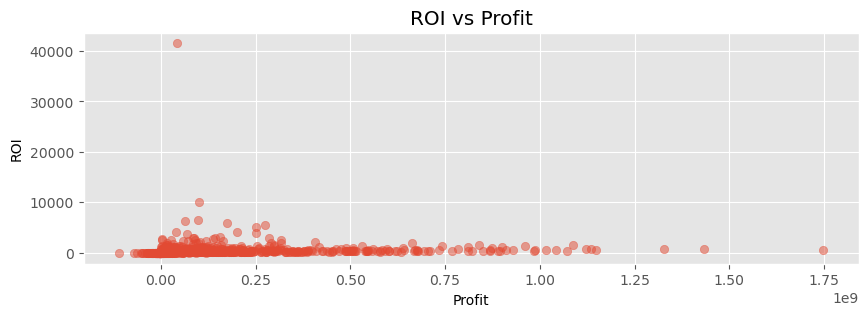

In [87]:
# Scatter plot of Profit vs ROI
plt.figure(figsize=(10, 3))
plt.scatter(df_finance['profit'], df_finance['roi'], alpha=0.5)
plt.xlabel('Profit')
plt.ylabel('ROI')
plt.title('ROI vs Profit')
plt.show()

Let us zoom into the lower part in order to get rid of the outlier and view the spread of the data. 
We will also add a regression line in blue to identify the tendency of this correlation.

In [88]:
df_finance.describe()
# Scale in hundreds of millions - instead of millions

domestic_gross_x    year      id  production_budget  worldwide_gross  \
count           1245.00 1247.00 1247.00            1247.00          1247.00   
mean        60623530.91 2013.55   50.92        46994109.88     152125895.95   
std         84776070.67    2.54   28.23        55942082.49     235023823.06   
min              800.00 2010.00    1.00           50000.00             0.00   
25%          7500000.00 2011.00   27.00        10000000.00      18019622.00   
50%         33400000.00 2013.00   51.00        25000000.00      65343694.00   
75%         74200000.00 2016.00   74.00        60000000.00     172104135.50   
max        700100000.00 2018.00  100.00       410600000.00    2048134200.00   

             profit      roi  
count       1247.00  1247.00  
mean   105131786.07   334.77  
std    194377494.78  1337.55  
min   -110450242.00  -100.00  
25%      2288380.00    15.73  
50%     31449135.00   145.09  
75%    118708945.50   329.13  
max   1748134200.00 41556.47

In [89]:
df_finance.corr()

C:\Users\rafvr\AppData\Local\Temp\ipykernel_18712\2982948346.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_finance.corr()


domestic_gross_x  year    id  production_budget  \
domestic_gross_x               1.00  0.11 -0.03               0.70   
year                           0.11  1.00  0.06               0.07   
id                            -0.03  0.06  1.00              -0.08   
production_budget              0.70  0.07 -0.08               1.00   
worldwide_gross                0.94  0.13 -0.05               0.78   
profit                         0.93  0.13 -0.04               0.66   
roi                            0.08  0.04  0.03              -0.07   

                   worldwide_gross  profit   roi  
domestic_gross_x              0.94    0.93  0.08  
year                          0.13    0.13  0.04  
id                           -0.05   -0.04  0.03  
production_budget             0.78    0.66 -0.07  
worldwide_gross               1.00    0.98  0.07  
profit                        0.98    1.00  0.10  
roi                           0.07    0.10  1.00

In [90]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

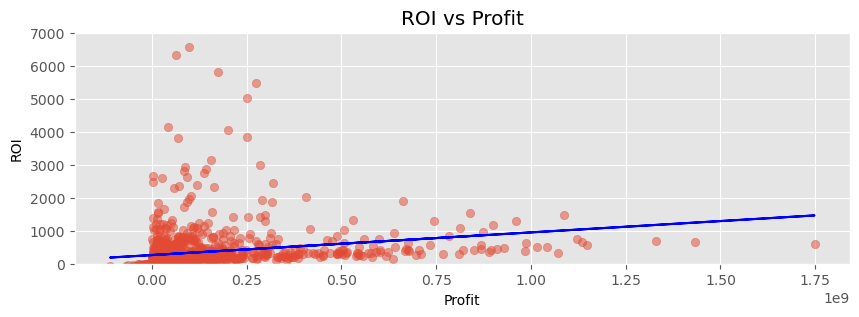

In [91]:
# Scatter plot of Profit vs ROI
plt.figure(figsize=(10, 3))
plt.scatter(df_finance['profit'], df_finance['roi'], alpha=0.5)
plt.xlabel('Profit')
plt.ylabel('ROI')
plt.title('ROI vs Profit')
plt.ylim(0, 7000)

# Calculate regression line
regression_params = np.polyfit(df_finance['profit'], df_finance['roi'], 1)
regression_line = np.polyval(regression_params, df_finance['profit'])

# Plot regression line in blue
plt.plot(df_finance['profit'], regression_line, color='blue')

plt.show()

# Find optima scale, clarify what you're measuring 
# budget vs profit or ROI

We can see a positive correlation between Profit and ROI. The data dots cluster towards the left, and then expand through the graph plot. This suggests that we should assess each one separatedly.

In [92]:
# Retrieve the 25 greatest ROI movies
top_roi_movies = df_finance.nlargest(25, 'roi')
print("25 Movies with the Greatest ROI")
print(top_roi_movies[['title', 'roi']])

# Retrieve the 25 greatest profit movies
top_profit_movies = df_finance.nlargest(25, 'profit')
print("\n25 Movies with the Greatest Profit:")
print(top_profit_movies[['title', 'profit']])


25 Movies with the Greatest ROI
                      title      roi
850             The Gallows 41556.47
407        The Devil Inside 10075.95
245               Insidious  6558.06
831              Unfriended  6336.42
33    Paranormal Activity 2  5817.07
1075                  Split  5479.30
1077                Get Out  5007.36
438       Chernobyl Diaries  4141.17
212   Paranormal Activity 3  4040.80
662               Annabelle  3851.74
70        The Last Exorcism  3798.11
537     Insidious Chapter 2  3138.43
933                  Dangal  3001.63
559               The Purge  2942.22
951              Lights Out  2876.13
415                Sinister  2824.26
392   Paranormal Activity 4  2756.36
1147          A Ghost Story  2669.78
1193          Truth or Dare  2617.92
606             You're Next  2588.72
482    Your Sister's Sister  2475.49
11               Black Swan  2448.21
1098        Happy Death Day  2400.21
829                War Room  2365.84
389              Magic Mike  2336.43

25 Mo

### Data Cleaning

It is very important to work with clean data, eliminate duplicates, and have things in proper order. We will now proceed to clean and organize our two merged dataframes, before we merge them together. We will the be able to ask the proper questions, and visualize our answers.

We will beging clearing out rows that are missing runtime, average rating, and number of votes information. We will use the dropna() method in Pandas to drop any rows that contain NaN values in the specified columns. 

In [93]:
# Drop any rows where any of the columns 'runtime_minutes', 'averagerating', or 'numvotes' contain NaN values. 
# The inplace=True argument modifies the original DataFrame instead of returning a new one.
df_im_mgd.dropna(subset=['runtime_minutes', 'averagerating', 'numvotes'], inplace=True)
df_im_mgd

movie_id                    primary_title  \
0       tt0063540                        Sunghursh   
1       tt0066787  One Day Before the Rainy Season   
2       tt0069049       The Other Side of the Wind   
4       tt0100275         The Wandering Soap Opera   
7       tt0137204                  Joe Finds Grace   
...           ...                              ...   
146113  tt9911774        Padmavyuhathile Abhimanyu   
146114  tt9913056                     Swarm Season   
146115  tt9913084                 Diabolik sono io   
146122  tt9914286                Sokagin Çocuklari   
146134  tt9916160                       Drømmeland   

                    original_title  start_year  runtime_minutes  \
0                        Sunghursh        2013           175.00   
1                  Ashad Ka Ek Din        2019           114.00   
2       The Other Side of the Wind        2018           122.00   
4            La Telenovela Errante        2017            80.00   
7                  Joe Finds Grace        2017            83.00   
...                            ...         ...              ...   
146113   Padmavyuhathile Abhimanyu        2019           130.00   
146114                Swarm Season        2019            86.00   
146115            Diabolik sono io        2019            75.00   
146122           Sokagin Çocuklari        2019            98.00   
146134                  Drømmeland        2019            72.00   

                            genres  averagerating  numvotes  
0               Action,Crime,Drama           7.00     77.00  
1                  Biography,Drama           7.20     43.00  
2                            Drama           6.90   4517.00  
4             Comedy,Drama,Fantasy           6.50    119.00  
7       Adventure,Animation,Comedy           8.10    263.00  
...                            ...            ...       ...  
146113                       Drama           8.40    365.00  
146114                 Documentary           6.20      5.00  
146115                 Documentary           6.20      6.00  
146122                Drama,Family           8.70    136.00  
146134                 Documentary           6.50     11.00  

[66236 rows x 8 columns]

Now lets create a dataframe with any cases in which 'primary_title' and 'original_title' are different. This will let us know if we can eliminate one of the two columns.

In [94]:
df_diff_titles = df_im_mgd.loc[df_im_mgd['primary_title'] != df_im_mgd['original_title']]
df_diff_titles.head()

movie_id                    primary_title            original_title  \
1   tt0066787  One Day Before the Rainy Season           Ashad Ka Ek Din   
4   tt0100275         The Wandering Soap Opera     La Telenovela Errante   
11  tt0154039             So Much for Justice!            Oda az igazság   
13  tt0162942     Children of the Green Dragon  A zöld sárkány gyermekei   
15  tt0176694               The Tragedy of Man       Az ember tragédiája   

    start_year  runtime_minutes                   genres  averagerating  \
1         2019           114.00          Biography,Drama           7.20   
4         2017            80.00     Comedy,Drama,Fantasy           6.50   
11        2010           100.00                  History           4.60   
13        2010            89.00                    Drama           6.90   
15        2011           160.00  Animation,Drama,History           7.80   

    numvotes  
1      43.00  
4     119.00  
11     64.00  
13    120.00  
15    584.00

In [95]:
df_diff_titles.shape

(11514, 8)

How do Average Rating a Number of Votes related to each other?

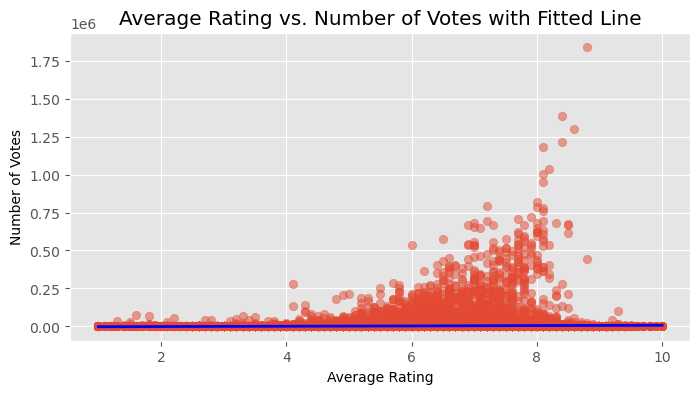

In [96]:
# Fit a polynomial regression line
coefficients = np.polyfit(df_im_mgd['averagerating'], df_im_mgd['numvotes'], 1)
polynomial = np.poly1d(coefficients)
x = np.linspace(df_im_mgd['averagerating'].min(), df_im_mgd['averagerating'].max(), 100)
y = polynomial(x)

plt.figure(figsize=(8, 4))
plt.scatter(df_im_mgd['averagerating'], df_im_mgd['numvotes'], alpha=0.5)
plt.plot(x, y, color='blue', linewidth=2)
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.title('Average Rating vs. Number of Votes with Fitted Line')
plt.show()

Average rating is greater when there are more votes per movie - I assume this means that more people go to watch the most popular movies, and give them a better rating. But the correlation is not significant. A regression line suggests this is not relevant at all. 

# Another DF Merger

In [97]:
# Merge movie_basics and movie_ratings on movie_id

movie_bas_rat = pd.merge(movie_basics_df, 
                        movie_ratings_df, 
                        on=['movie_id'], 
                        how='inner')

In [98]:
movie_bas_rat.head()

movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  averagerating  numvotes  
0        2013           175.00    Action,Crime,Drama           7.00        77  
1        2019           114.00       Biography,Drama           7.20        43  
2        2018           122.00                 Drama           6.90      4517  
3        2018              NaN          Comedy,Drama           6.10        13  
4        2017            80.00  Comedy,Drama,Fantasy           6.50       119

In [99]:
movie_bas_rat['primary_title'].nunique()

69993

In [100]:
movie_bas_rat['original_title'].nunique()

71097

In [101]:
movie_bas_rat.shape

(73856, 8)

In [102]:
movie_bas_rat['movie_id'].nunique()

73856

In [103]:
df_finance.shape

(1247, 13)

# Eliminate duplicate columns

In [104]:
# eliminate duplicate columns
movie_bas_rat.drop_duplicates(['primary_title'], inplace=True)

In [105]:
movie_bas_rat.shape 

(69993, 8)

In [106]:
# eliminate duplicate columns
df_finance.drop_duplicates(['movie'], inplace=True)

In [107]:
df_finance.shape

(1238, 13)

# Merging Dataset ( movie_bas_rat & df_finance)

In [108]:
# Merge movie_bas_rat and tn_movie on primary_title & movie
mov_bas_rat2 = pd.merge(movie_bas_rat, 
                        df_finance, 
                        left_on=['primary_title'], 
                        right_on= ['movie'],
                        how='inner')

In [109]:
mov_bas_rat2

movie_id                    primary_title  \
0     tt0337692                      On the Road   
1     tt0359950  The Secret Life of Walter Mitty   
2     tt0365907      A Walk Among the Tombstones   
3     tt0369610                   Jurassic World   
4     tt0376136                    The Rum Diary   
...         ...                              ...   
1152  tt7334528                       Uncle Drew   
1153  tt7349662                   BlacKkKlansman   
1154  tt7388562          Paul, Apostle of Christ   
1155  tt7401588                   Instant Family   
1156  tt7784604                       Hereditary   

                       original_title  start_year  runtime_minutes  \
0                         On the Road        2012           124.00   
1     The Secret Life of Walter Mitty        2013           114.00   
2         A Walk Among the Tombstones        2014           114.00   
3                      Jurassic World        2015           124.00   
4                       The Rum Diary        2011           119.00   
...                               ...         ...              ...   
1152                       Uncle Drew        2018           103.00   
1153                   BlacKkKlansman        2018           135.00   
1154          Paul, Apostle of Christ        2018           108.00   
1155                   Instant Family        2018           118.00   
1156                       Hereditary        2018           127.00   

                         genres  averagerating  numvotes  \
0       Adventure,Drama,Romance           6.10     37886   
1        Adventure,Comedy,Drama           7.30    275300   
2            Action,Crime,Drama           6.50    105116   
3       Action,Adventure,Sci-Fi           7.00    539338   
4                  Comedy,Drama           6.20     94787   
...                         ...            ...       ...   
1152               Comedy,Sport           5.70      9739   
1153      Biography,Crime,Drama           7.50    149005   
1154  Adventure,Biography,Drama           6.70      5662   
1155               Comedy,Drama           7.40     46728   
1156       Drama,Horror,Mystery           7.30    151571   

                                title  studio  ...  foreign_gross  year  id  \
0                         On the Road     IFC  ...        8000000  2012  17   
1     The Secret Life of Walter Mitty     Fox  ...      129900000  2013  37   
2         A Walk Among the Tombstones    Uni.  ...       26900000  2014  67   
3                      Jurassic World    Uni.  ...        1,019.4  2015  34   
4                       The Rum Diary      FD  ...       10800000  2011  16   
...                               ...     ...  ...            ...   ...  ..   
1152                       Uncle Drew    LG/S  ...        4200000  2018  85   
1153                   BlacKkKlansman   Focus  ...       44000000  2018  21   
1154          Paul, Apostle of Christ  Affirm  ...        5500000  2018  95   
1155                   Instant Family    Par.  ...       53200000  2018  20   
1156                       Hereditary     A24  ...       35300000  2018  56   

      release_date                            movie production_budget  \
0     Mar 22, 2013                      On the Road       25000000.00   
1     Dec 25, 2013  The Secret Life of Walter Mitty       91000000.00   
2     Sep 19, 2014      A Walk Among the Tombstones       28000000.00   
3     Jun 12, 2015                   Jurassic World      215000000.00   
4     Oct 28, 2011                    The Rum Diary       45000000.00   
...            ...                              ...               ...   
1152  Jun 29, 2018                       Uncle Drew       18000000.00   
1153  Aug 10, 2018                   BlacKkKlansman       15000000.00   
1154  Mar 23, 2018          Paul, Apostle of Christ        5000000.00   
1155  Nov 16, 2018                   Instant Family       48000000.00   
1156   Jun 8, 2018                       Hereditary       10000000.0

In [110]:
mov_bas_rat2.head()

movie_id                    primary_title  \
0  tt0337692                      On the Road   
1  tt0359950  The Secret Life of Walter Mitty   
2  tt0365907      A Walk Among the Tombstones   
3  tt0369610                   Jurassic World   
4  tt0376136                    The Rum Diary   

                    original_title  start_year  runtime_minutes  \
0                      On the Road        2012           124.00   
1  The Secret Life of Walter Mitty        2013           114.00   
2      A Walk Among the Tombstones        2014           114.00   
3                   Jurassic World        2015           124.00   
4                    The Rum Diary        2011           119.00   

                    genres  averagerating  numvotes  \
0  Adventure,Drama,Romance           6.10     37886   
1   Adventure,Comedy,Drama           7.30    275300   
2       Action,Crime,Drama           6.50    105116   
3  Action,Adventure,Sci-Fi           7.00    539338   
4             Comedy,Drama           6.20     94787   

                             title studio  ...  foreign_gross  year  id  \
0                      On the Road    IFC  ...        8000000  2012  17   
1  The Secret Life of Walter Mitty    Fox  ...      129900000  2013  37   
2      A Walk Among the Tombstones   Uni.  ...       26900000  2014  67   
3                   Jurassic World   Uni.  ...        1,019.4  2015  34   
4                    The Rum Diary     FD  ...       10800000  2011  16   

   release_date                            movie production_budget  \
0  Mar 22, 2013                      On the Road       25000000.00   
1  Dec 25, 2013  The Secret Life of Walter Mitty       91000000.00   
2  Sep 19, 2014      A Walk Among the Tombstones       28000000.00   
3  Jun 12, 2015                   Jurassic World      215000000.00   
4  Oct 28, 2011                    The Rum Diary       45000000.00   

   domestic_gross_y worldwide_gross        profit    roi  
0          $720,828      9313302.00  -15686698.00 -62.75  
1       $58,236,838    187861183.00   96861183.00 106.44  
2       $26,017,685     62108587.00   34108587.00 121.82  
3      $652,270,625   1648854864.00 1433854864.00 666.91  
4       $13,109,815     21544732.00  -23455268.00 -52.12  

[5 rows x 21 columns]

In [111]:
mov_bas_rat2.shape

(1157, 21)

In [112]:
mov_bas_rat2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1157 entries, 0 to 1156
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1157 non-null   object 
 1   primary_title      1157 non-null   object 
 2   original_title     1157 non-null   object 
 3   start_year         1157 non-null   int64  
 4   runtime_minutes    1148 non-null   float64
 5   genres             1156 non-null   object 
 6   averagerating      1157 non-null   float64
 7   numvotes           1157 non-null   int64  
 8   title              1157 non-null   object 
 9   studio             1157 non-null   object 
 10  domestic_gross_x   1156 non-null   float64
 11  foreign_gross      1003 non-null   object 
 12  year               1157 non-null   int64  
 13  id                 1157 non-null   int64  
 14  release_date       1157 non-null   object 
 15  movie              1157 non-null   object 
 16  production_budget  1157 

In [113]:
mov_bas_rat2.groupby('genres')

In [114]:
# groupby objects are intended to be used with aggregation
mov_bas_rat2.groupby('genres').count()

movie_id  primary_title  original_title  \
genres                                                                
Action                             4              4               4   
Action,Adventure                   1              1               1   
Action,Adventure,Animation        13             13              13   
Action,Adventure,Biography         2              2               2   
Action,Adventure,Comedy           16             16              16   
...                              ...            ...             ...   
Music                              1              1               1   
Mystery,Sci-Fi,Thriller            2              2               2   
Mystery,Thriller                   1              1               1   
Romance,Sci-Fi,Thriller            1              1               1   
Thriller                           4              4               4   

                            start_year  runtime_minutes  averagerating  \
genres                                                                   
Action                               4                2              4   
Action,Adventure                     1                1              1   
Action,Adventure,Animation          13               13             13   
Action,Adventure,Biography           2                2              2   
Action,Adventure,Comedy             16               16             16   
...                                ...              ...            ...   
Music                                1                1              1   
Mystery,Sci-Fi,Thriller              2                2              2   
Mystery,Thriller                     1                1              1   
Romance,Sci-Fi,Thriller              1                1              1   
Thriller                             4                3              4   

                            numvotes  title  studio  domestic_gross_x  \
genres                                                                  
Action                             4      4       4                 4   
Action,Adventure                   1      1       1                 1   
Action,Adventure,Animation        13     13      13                13   
Action,Adventure,Biography         2      2       2                 2   
Action,Adventure,Comedy           16     16      16                16   
...                              ...    ...     ...               ...   
Music                              1      1       1                 1   
Mystery,Sci-Fi,Thriller            2      2       2                 2   
Mystery,Thriller                   1      1       1                 1   
Romance,Sci-Fi,Thriller            1      1       1                 1   
Thriller                           4      4       4                 4   

                            foreign_gross  year  id  release_date  movie  \
genres                                                                     
Action                                  4     4   4             4      4   
Action,Adventure                        0     1   1             1      1   
Action,Adventure,Animation             13    13  13            13     13   
Action,Adventure,Biography              2     2   2             2      2   
Action,Adventure,Comedy                16    16  16            16     16   
...                                   ...   ...  ..           ...    ...   
Music                                   1     1   1             1      1   
Mystery,Sci-Fi,Thriller                 2     2   2             2      2   
Mystery,Thriller                        1     1   1             1      1   
Romance,Sci-Fi,Thriller                 1     1   1             1      1   
Thriller                                3     4   4             4      4   

                            production_budget  domestic_gross_y  \
genres                                                            
Action                                      4                 4   
A

In [115]:
mov_bas_rat2['genres'].value_counts()

Adventure,Animation,Comedy    59
Comedy,Drama,Romance          48
Action,Adventure,Sci-Fi       44
Comedy,Drama                  42
Drama                         41
                              ..
Action,Crime                   1
Drama,Family,Music             1
Comedy,Mystery                 1
Adventure,Drama,Western        1
Comedy,Sport                   1
Name: genres, Length: 193, dtype: int64

Let's now explore the relationship between ROI and Genre. We will then compare with real profit.

In [116]:
# Filter out rows with missing values in 'roi' or 'genres'
filtered_data = mov_bas_rat2.dropna(subset=['roi', 'genres'])

# Calculate the top 25 genres based on ROI
top_genres = filtered_data.groupby('genres')['roi'].mean().nlargest(25).index.tolist()

# Filter data for top genres
genre_data = filtered_data[filtered_data['genres'].isin(top_genres)]

# Sort genre_data by ROI in descending order
genre_data = genre_data.sort_values('roi', ascending=False)

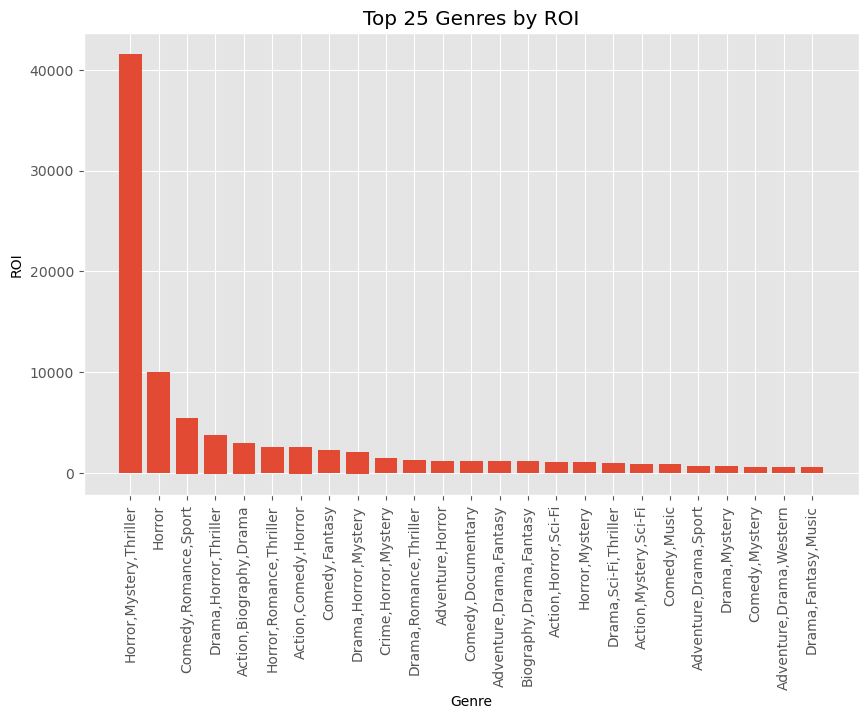

In [117]:
# Set up the plot
plt.figure(figsize=(10, 6))
plt.bar(genre_data['genres'], genre_data['roi'])
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.title('Top 25 Genres by ROI')
plt.xticks(rotation=90)
plt.show()

Now for Profit

In [118]:
# Filter out rows with missing values in 'profit' or 'genres'
filtered_data = mov_bas_rat2.dropna(subset=['profit', 'genres'])

# Calculate the top 25 genres based on profit
top_genres = filtered_data.groupby('genres')['profit'].mean().nlargest(25).index.tolist()

# Filter data for top genres
genre_data = filtered_data[filtered_data['genres'].isin(top_genres)]

# Sort genre_data by profit in descending order
genre_data = genre_data.sort_values('profit', ascending=False)

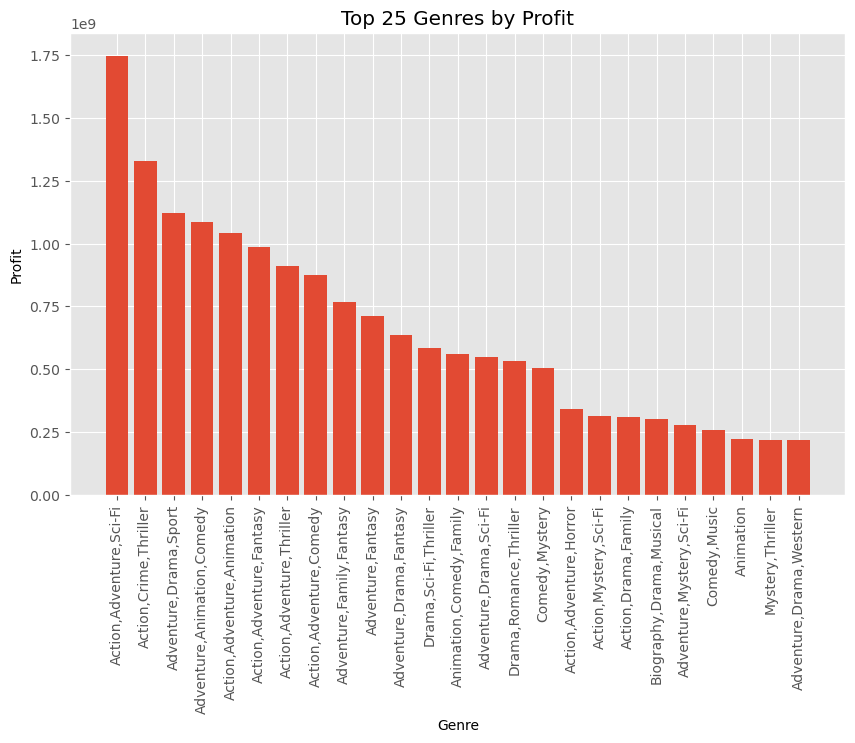

In [119]:
# Set up the plot
plt.figure(figsize=(10, 6))
plt.bar(genre_data['genres'], genre_data['profit'])
plt.xlabel('Genre')
plt.ylabel('Profit')
plt.title('Top 25 Genres by Profit')
plt.xticks(rotation=90)
plt.ylim(bottom=0)  # Set the minimum y-axis value to zero
plt.show()

I want to analize this by single genre, rather than by a combination of genre categories per each film. So let's break it apart.

In [120]:
genre_list2 = mov_bas_rat2['genres'].str.split(',').explode().str.strip().unique().tolist()
print(genre_list2)

['Adventure', 'Drama', 'Romance', 'Comedy', 'Action', 'Crime', 'Sci-Fi', 'Family', 'Animation', 'Thriller', 'Horror', 'Mystery', 'Biography', 'History', 'Fantasy', 'Music', 'Documentary', 'War', 'Sport', 'Western', 'Musical', None]


Let's now explore the relationship between ROI and Genre.

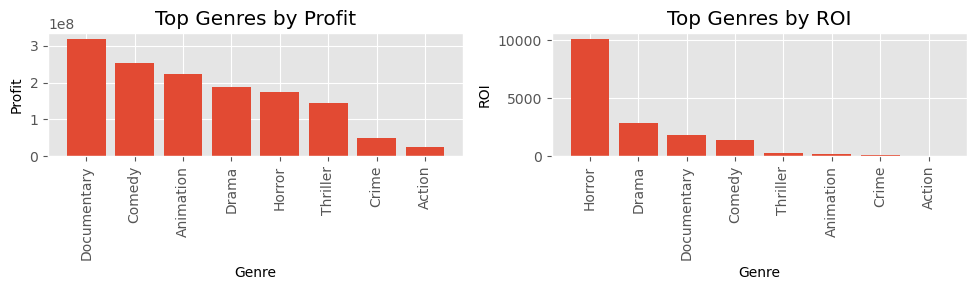

In [121]:
import matplotlib.pyplot as plt

# Filter out rows with missing values in 'profit' or 'genres'
filtered_data = mov_bas_rat2.dropna(subset=['profit', 'genres'])

# Exclude rows with negative profit values
filtered_data = filtered_data[filtered_data['profit'] >= 0]

# Calculate the mean ROFIT for each genre
genre_profit = filtered_data.groupby('genres')['profit'].mean()

# Filter genre_list2 to include only existing genres
genre_list2_filtered = [genre for genre in genre_list2 if genre in genre_profit.index]

# Select the top 25 genres based on profit
top_genres_profit = genre_profit[genre_list2_filtered].nlargest(25).index.tolist()

# Filter data for top genres based on profit
genre_data_profit = filtered_data[filtered_data['genres'].isin(top_genres_profit)]

# Sort genre_data_profit by profit in descending order
genre_data_profit = genre_data_profit.sort_values('profit', ascending=False)

# Calculate the mean ROI for each genre
genre_roi = filtered_data.groupby('genres')['roi'].mean()

# Select the top 25 genres based on ROI
top_genres_roi = genre_roi[genre_list2_filtered].nlargest(25).index.tolist()

# Filter data for top genres based on ROI
genre_data_roi = filtered_data[filtered_data['genres'].isin(top_genres_roi)]

# Sort genre_data_roi by ROI in descending order
genre_data_roi = genre_data_roi.sort_values('roi', ascending=False)

# Set up the subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Plot for Real Profit
axes[0].bar(genre_data_profit['genres'], genre_data_profit['profit'])
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Profit')
axes[0].set_title('Top Genres by Profit')
axes[0].tick_params(axis='x', rotation=90)

# Plot for ROI
axes[1].bar(genre_data_roi['genres'], genre_data_roi['roi'])
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('ROI')
axes[1].set_title('Top Genres by ROI')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


"Horror, Mystery, Thriller" seems like the best genre combination for ROI results. Followed by "Horror"alone. This is a definite thred. 

When simplifying genre clasification to a single subject, "documentary" looks like the best choice for profit, followed by "comedy". But when looking for the ROI criteria, "horror" is, by far the best choice.

In the case of profit, "Action, Adventure, Sci-Fi" is a winner, followed by "Action, Crime, Thriller". This, however, changes when we break it down to single genre categories, making "Documentary" the best choice.  This doesn't mean that documentaries will render the best profit, but it is a good as a "back burner" recommendation.

# The Runtime Factor

I presume, although we will verify this, that the longest a film runs, the higher the cost. Will the profit gained from a longer-running film justify the budget? 

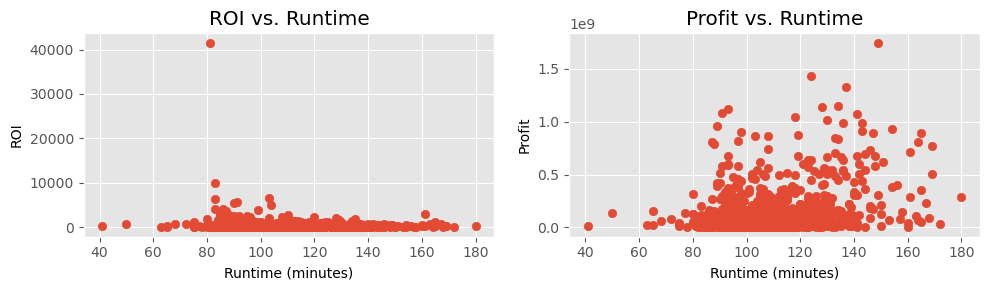

In [122]:
# Filter out rows with missing values in 'runtime_minutes', 'roi', or 'profit'
filtered_data = mov_bas_rat2.dropna(subset=['runtime_minutes', 'roi', 'profit'])

# Exclude rows with negative profit values
filtered_data = filtered_data[filtered_data['profit'] >= 0]

# Set up the subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Plot for ROI vs. Runtime
axes[0].scatter(filtered_data['runtime_minutes'], filtered_data['roi'])
axes[0].set_xlabel('Runtime (minutes)')
axes[0].set_ylabel('ROI')
axes[0].set_title('ROI vs. Runtime')

# Plot for Profit vs. Runtime
axes[1].scatter(filtered_data['runtime_minutes'], filtered_data['profit'])
axes[1].set_xlabel('Runtime (minutes)')
axes[1].set_ylabel('Profit')
axes[1].set_title('Profit vs. Runtime')

plt.tight_layout()
plt.show()

In [123]:
mov_bas_rat2.columns


Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'title',
       'studio', 'domestic_gross_x', 'foreign_gross', 'year', 'id',
       'release_date', 'movie', 'production_budget', 'domestic_gross_y',
       'worldwide_gross', 'profit', 'roi'],
      dtype='object')

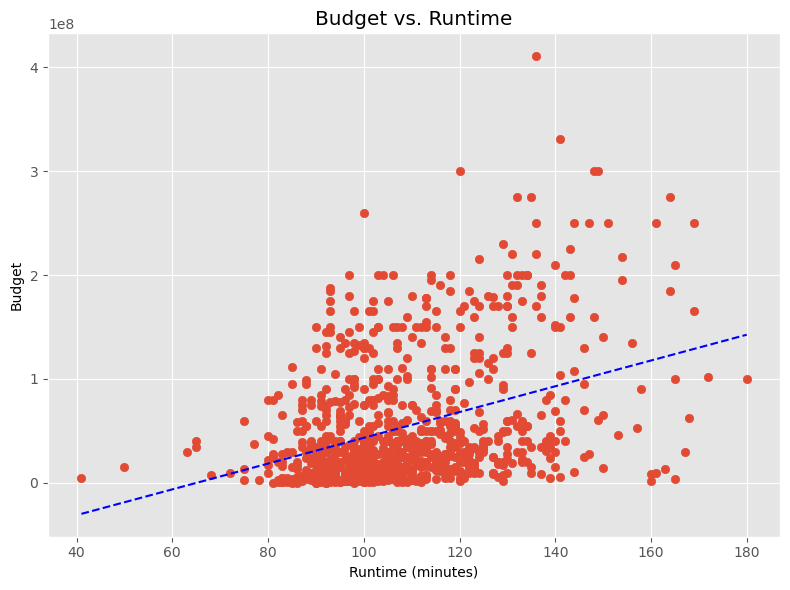

In [124]:
# Filter out rows with missing values in specified columns
filtered_data = mov_bas_rat2.dropna(subset=['runtime_minutes', 'roi', 'profit', 'production_budget'])

# Exclude rows with negative profit values
filtered_data = filtered_data[filtered_data['profit'] >= 0]

# Set up the subplot
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size as needed

# Plot for Budget vs. Runtime
ax.scatter(filtered_data['runtime_minutes'], filtered_data['production_budget'])
ax.set_xlabel('Runtime (minutes)')
ax.set_ylabel('Budget')
ax.set_title('Budget vs. Runtime')

# Calculate regression line for Budget vs. Runtime
x_budget = filtered_data['runtime_minutes']
y_budget = filtered_data['production_budget']
coefficients_budget = np.polyfit(x_budget, y_budget, 1)
x_budget_line = np.linspace(x_budget.min(), x_budget.max(), 100)
y_budget_line = np.polyval(coefficients_budget, x_budget_line)
ax.plot(x_budget_line, y_budget_line, color='blue', linestyle='--')

plt.tight_layout()
plt.show()


This confirms my suspicions. The longer the runtime, the greater the budget. 

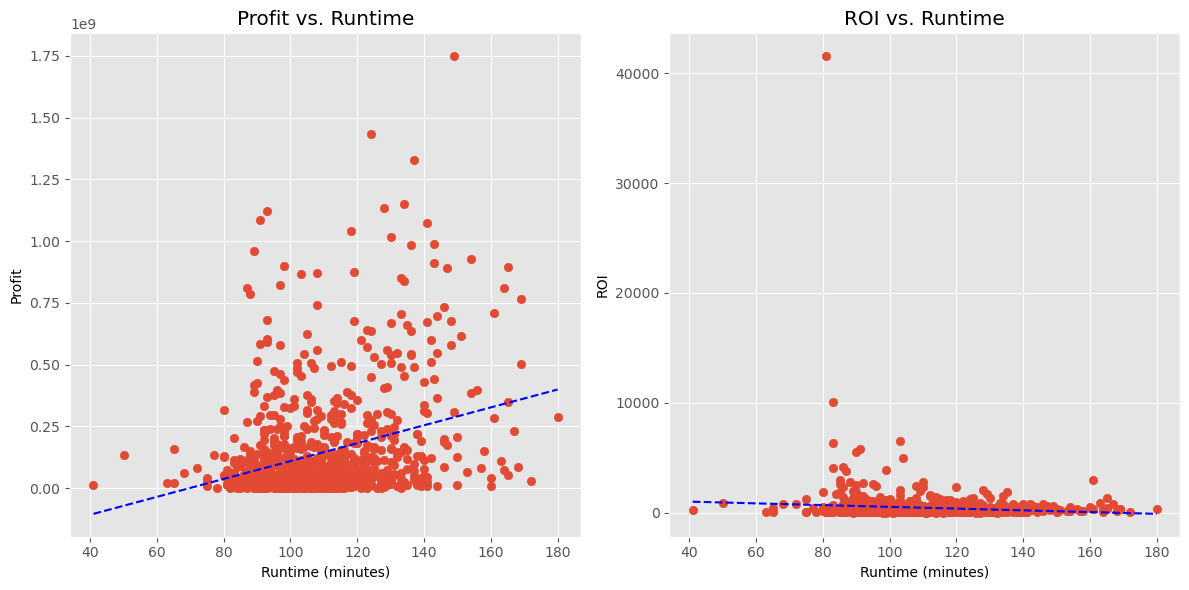

In [125]:
# Filter out rows with missing values in specified columns
filtered_data = mov_bas_rat2.dropna(subset=['runtime_minutes', 'roi', 'profit', 'production_budget'])

# Exclude rows with negative profit values
filtered_data = filtered_data[filtered_data['profit'] >= 0]

# Set up the subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Change this to 1 row and 2 columns

# Plot for Profit vs. Runtime (Left)
axes[0].scatter(filtered_data['runtime_minutes'], filtered_data['profit'])
axes[0].set_xlabel('Runtime (minutes)')
axes[0].set_ylabel('Profit')
axes[0].set_title('Profit vs. Runtime')

# Calculate regression line for Profit vs. Runtime
x_profit = filtered_data['runtime_minutes']
y_profit = filtered_data['profit']
coefficients_profit = np.polyfit(x_profit, y_profit, 1)
x_profit_line = np.linspace(x_profit.min(), x_profit.max(), 100)
y_profit_line = np.polyval(coefficients_profit, x_profit_line)
axes[0].plot(x_profit_line, y_profit_line, color='blue', linestyle='--')  # Changed color to blue

# Plot for ROI vs. Runtime (Right)
axes[1].scatter(filtered_data['runtime_minutes'], filtered_data['roi'])
axes[1].set_xlabel('Runtime (minutes)')
axes[1].set_ylabel('ROI')
axes[1].set_title('ROI vs. Runtime')

# Calculate regression line for ROI vs. Runtime
x_roi = filtered_data['runtime_minutes']
y_roi = filtered_data['roi']
coefficients_roi = np.polyfit(x_roi, y_roi, 1)
x_roi_line = np.linspace(x_roi.min(), x_roi.max(), 100)
y_roi_line = np.polyval(coefficients_roi, x_roi_line)
axes[1].plot(x_roi_line, y_roi_line, color='blue', linestyle='--')  # Changed color to blue

plt.tight_layout()
plt.show()


There is an increase in profit, but it is less significant. Bottom line: ROI vs. Runtime correlation is negative. We actually lose money by making a film longer.

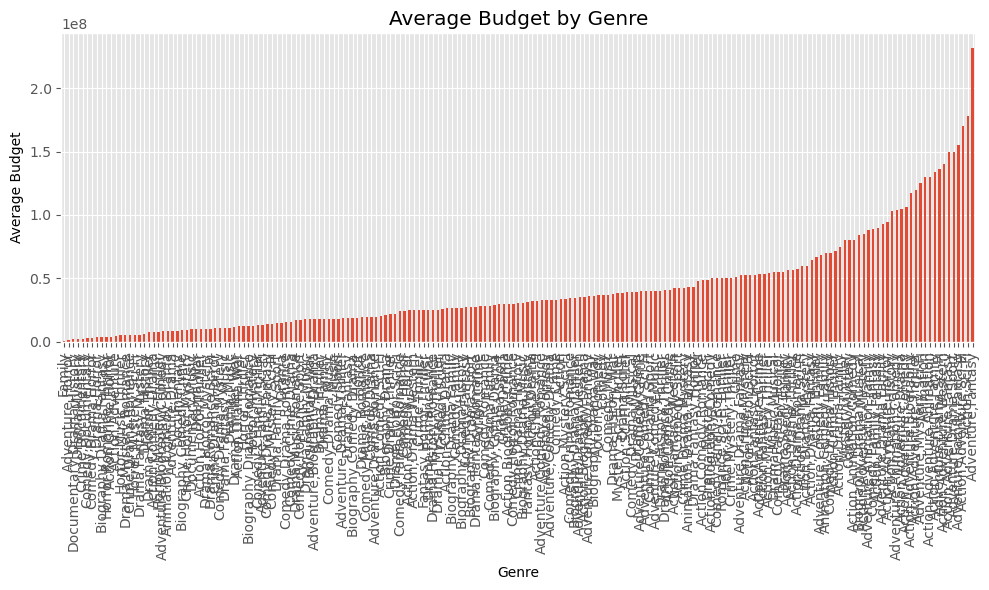

In [126]:
# Group movies by genre
genre_groups = mov_bas_rat2.groupby('genres')

# Calculate average budget for each genre
average_budget_by_genre = genre_groups['production_budget'].mean()

# Create a bar chart for average budget by genre
average_budget_by_genre.sort_values().plot(kind='bar', figsize=(10, 6))
plt.title('Average Budget by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Budget')
plt.tight_layout()
plt.show()


Obviously some genres are much more costly than others, but the list is too large to read and identify these. Let's look at the most expensive genres:

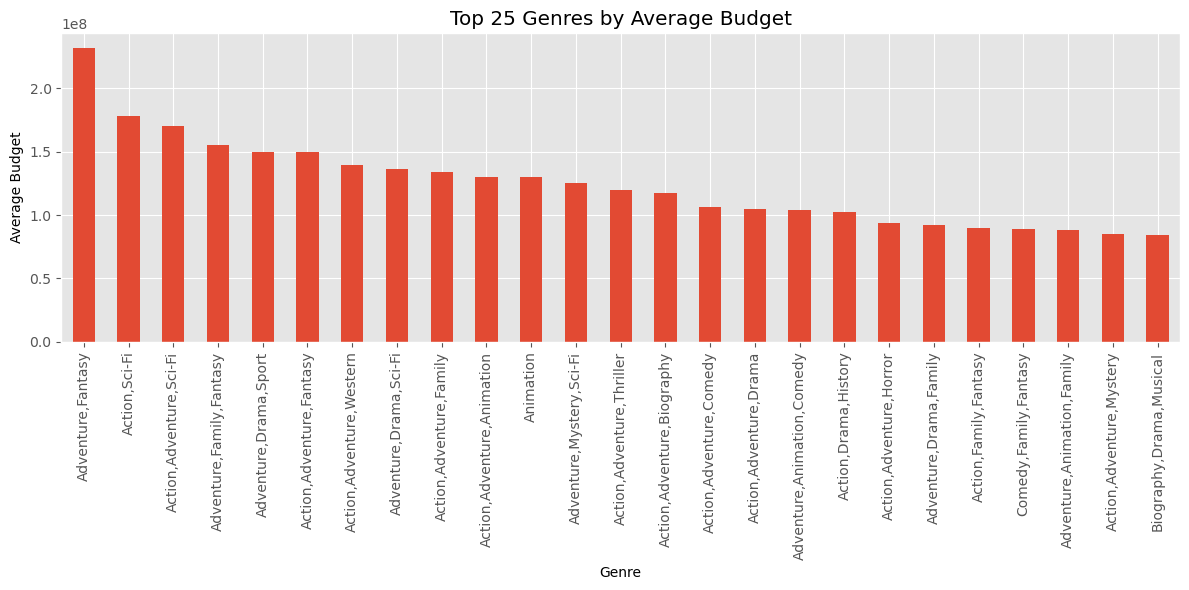

In [127]:
# Group movies by genre
genre_groups = mov_bas_rat2.groupby('genres')

# Calculate average budget for each genre
average_budget_by_genre = genre_groups['production_budget'].mean()

# Get the 25 genres with the highest average budget
top_25_genres = average_budget_by_genre.nlargest(25)

# Create a bar chart for the top 25 genres by average budget
top_25_genres.plot(kind='bar', figsize=(12, 6))
plt.title('Top 25 Genres by Average Budget')
plt.xlabel('Genre')
plt.ylabel('Average Budget')
plt.tight_layout()
plt.show()


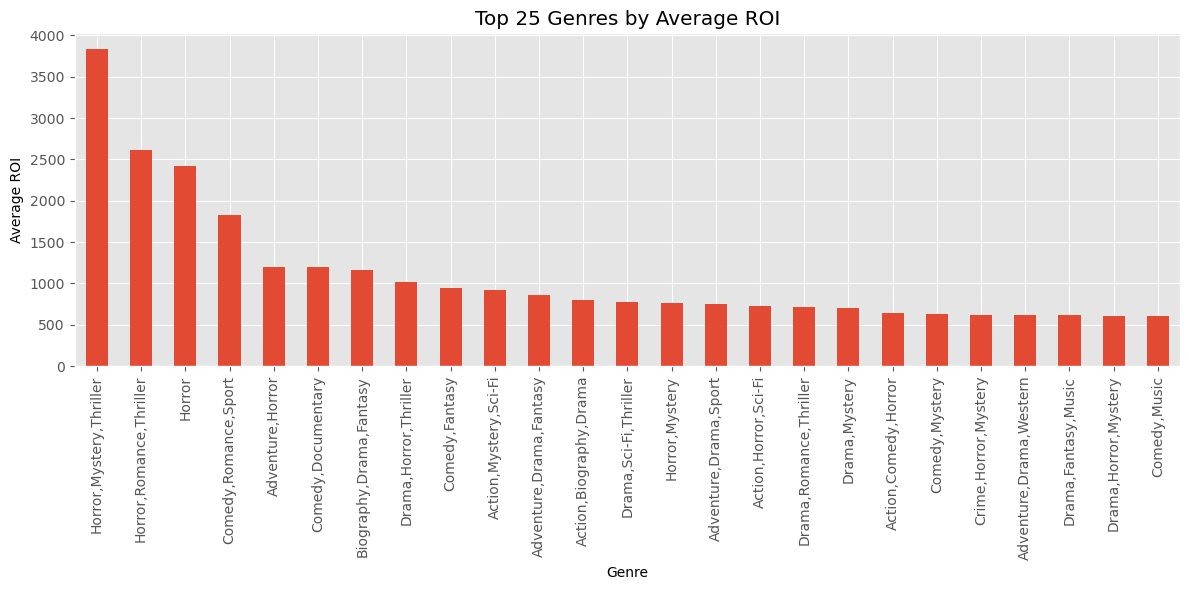

In [128]:
# Group movies by genre
genre_groups = mov_bas_rat2.groupby('genres')

# Calculate average ROI for each genre
average_roi_by_genre = genre_groups['roi'].mean()

# Get the 25 genres with the highest average ROI
top_25_genres = average_roi_by_genre.nlargest(25)

# Create a bar chart for the top 25 genres by average ROI
top_25_genres.plot(kind='bar', figsize=(12, 6))
plt.title('Top 25 Genres by Average ROI')
plt.xlabel('Genre')
plt.ylabel('Average ROI')
plt.tight_layout()
plt.show()


In [129]:
# Merge filtered_merged_df and mov_bas_rat2 on 'movie_id'
merged_director_budget_runtime = pd.merge(filtered_merged_df, mov_bas_rat2, on='movie_id', how='inner')

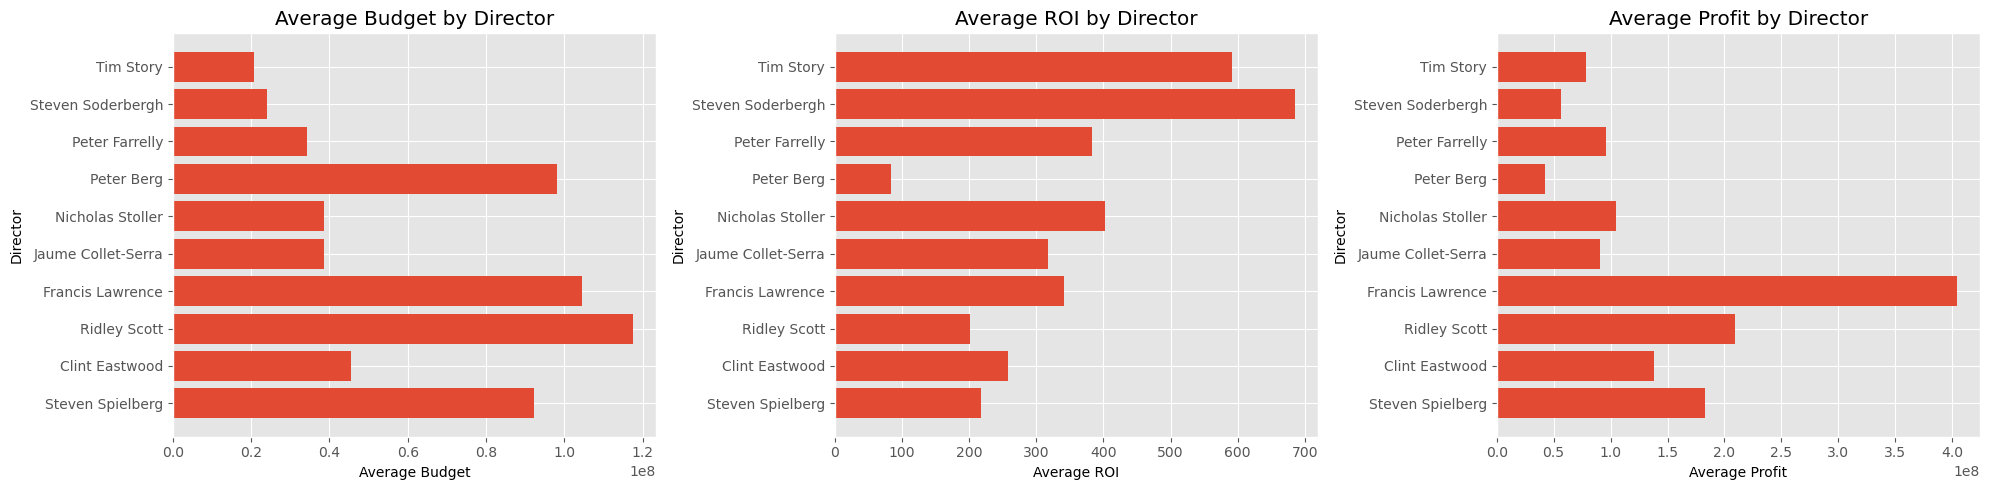

In [130]:
# Group movies by directors
director_groups = merged_director_budget_runtime.groupby('primary_name')

# Calculate average budget, ROI, and profit for each director
average_budget_by_director = director_groups['production_budget'].mean()
average_roi_by_director = director_groups['roi'].mean()
average_profit_by_director = director_groups['profit'].mean()

# Get the top directors based on the number of movies
top_directors = director_groups.size().nlargest(10).index

# Set up the subplot
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # 1 row and 3 columns

# Plot for Average Budget by Director
axes[0].barh(top_directors, average_budget_by_director.loc[top_directors])
axes[0].set_xlabel('Average Budget')
axes[0].set_ylabel('Director')
axes[0].set_title('Average Budget by Director')

# Plot for Average ROI by Director
axes[1].barh(top_directors, average_roi_by_director.loc[top_directors])
axes[1].set_xlabel('Average ROI')
axes[1].set_ylabel('Director')
axes[1].set_title('Average ROI by Director')

# Plot for Average Profit by Director
axes[2].barh(top_directors, average_profit_by_director.loc[top_directors])
axes[2].set_xlabel('Average Profit')
axes[2].set_ylabel('Director')
axes[2].set_title('Average Profit by Director')

plt.tight_layout()
plt.show()


In [131]:
num_directors = len(merged_director_budget_runtime['primary_name'].unique())
print("Number of directors:", num_directors)


Number of directors: 598


In [132]:
num_directors

598

In [133]:
unique_directors = merged_director_budget_runtime['primary_name'].unique()
unique_directors_sorted = sorted(unique_directors)

for director in unique_directors_sorted:
    print(director)


Aaron Seltzer
Adam Green
Adam McKay
Adam Robitel
Adam Shankman
Adam Wingard
Aki Kaurismäki
Akiva Schaffer
Alan Taylor
Albert Hughes
Alejandro Amenábar
Alejandro G. Iñárritu
Alejandro Monteverde
Aleksander Bach
Alex Garland
Alex Gibney
Alex Kendrick
Alex Kurtzman
Alex Proyas
Alexander Payne
Alexandre Aja
Alfonso Cuarón
Allen Hughes
Anand Tucker
Andrea Arnold
Andrea Di Stefano
Andrew Dominik
Andrew Haigh
Andrew Hyatt
Andrew Mogel
Andrew Niccol
Andrew Stanton
Andrey Konchalovskiy
Andy Tennant
Ang Lee
Angelina Jolie
Anna Boden
Anne Fletcher
Anthony Russo
Antoine Fuqua
Anton Corbijn
Ava DuVernay
Babak Najafi
Baltasar Kormákur
Barry Cook
Barry Jenkins
Ben Affleck
Ben Falcone
Ben Lewin
Ben Stiller
Ben Wheatley
Ben Younger
Benh Zeitlin
Bennett Miller
Beri Shalmashi
Bill Condon
Bob Odenkirk
Bobby Farrelly
Brad Anderson
Brad Bird
Brad Peyton
Breck Eisner
Brenda Chapman
Brett Ratner
Brian Klugman
Brian Levant
Brian Robbins
Bruce Robinson
Bryan Singer
Burr Steers
Byron Howard
Cameron Crowe
Camille

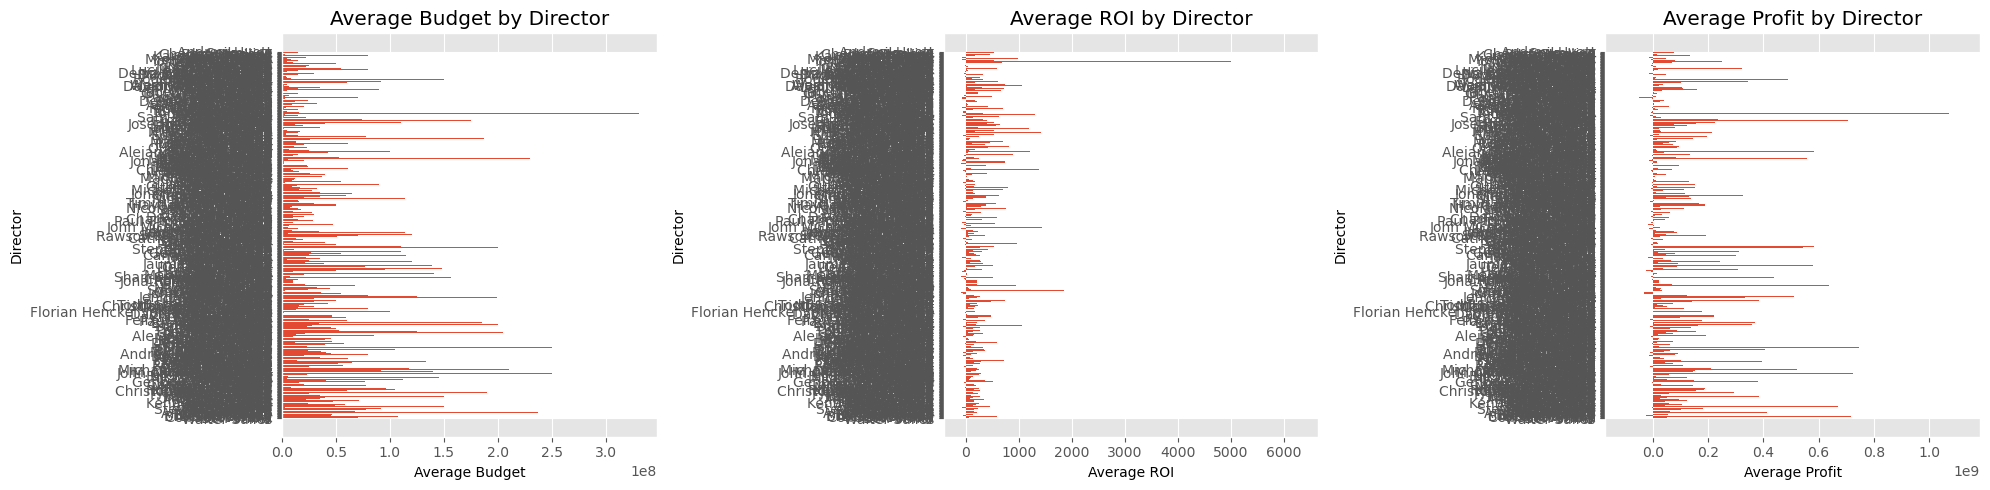

In [134]:
# Group movies by directors
director_groups = merged_director_budget_runtime.groupby('primary_name')

# Calculate average budget, ROI, and profit for each director
average_budget_by_director = director_groups['production_budget'].mean()
average_roi_by_director = director_groups['roi'].mean()
average_profit_by_director = director_groups['profit'].mean()

# Get all directors
all_directors = merged_director_budget_runtime['primary_name'].unique()

# Set up the subplot
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # 1 row and 3 columns

# Plot for Average Budget by Director
axes[0].barh(all_directors, average_budget_by_director.loc[all_directors])
axes[0].set_xlabel('Average Budget')
axes[0].set_ylabel('Director')
axes[0].set_title('Average Budget by Director')

# Plot for Average ROI by Director
axes[1].barh(all_directors, average_roi_by_director.loc[all_directors])
axes[1].set_xlabel('Average ROI')
axes[1].set_ylabel('Director')
axes[1].set_title('Average ROI by Director')

# Plot for Average Profit by Director
axes[2].barh(all_directors, average_profit_by_director.loc[all_directors])
axes[2].set_xlabel('Average Profit')
axes[2].set_ylabel('Director')
axes[2].set_title('Average Profit by Director')

plt.tight_layout()
plt.show()


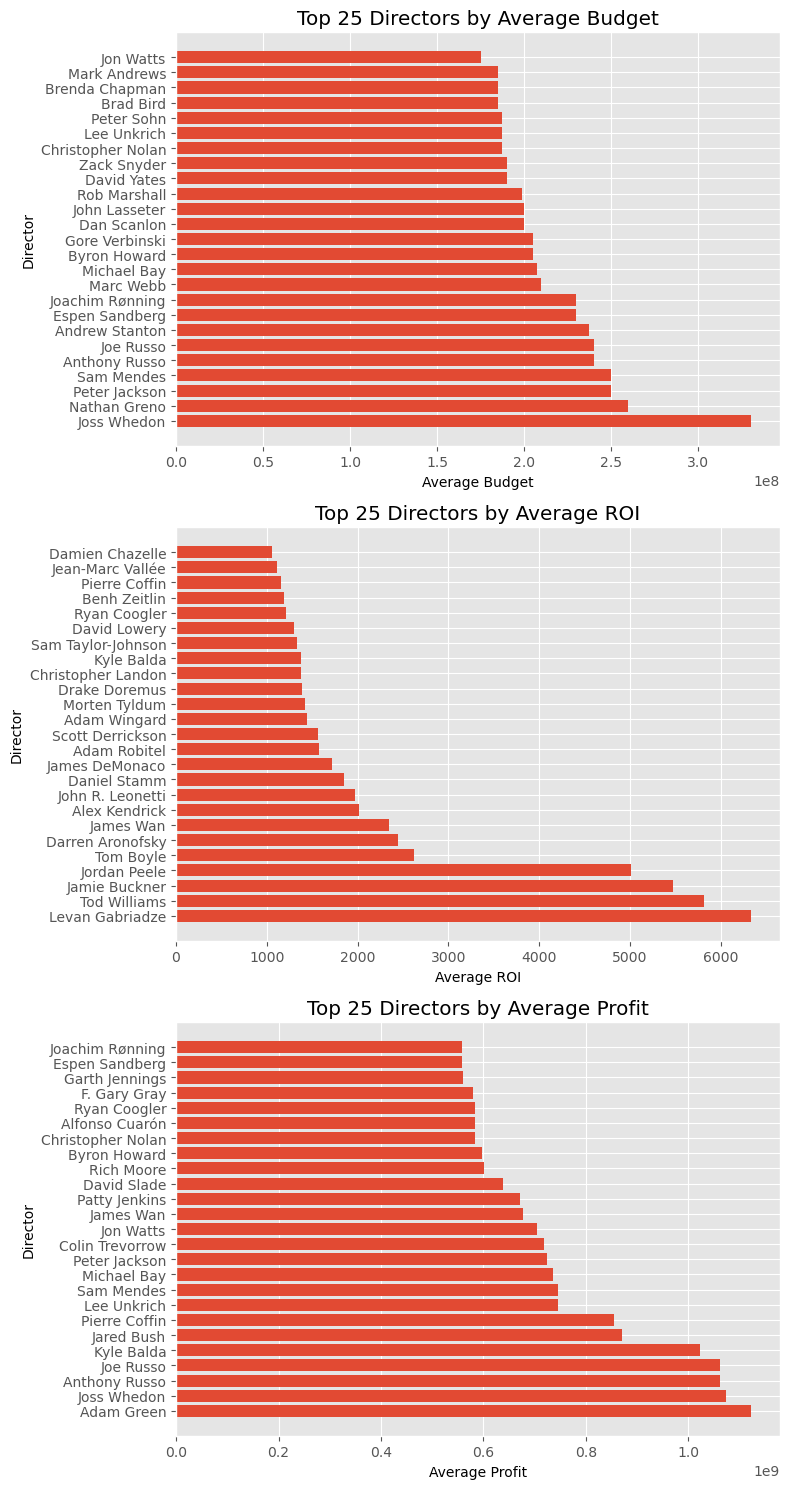

In [135]:
# Group movies by directors
director_groups = merged_director_budget_runtime.groupby('primary_name')

# Calculate average budget, ROI, and profit for each director
average_budget_by_director = director_groups['production_budget'].mean()
average_roi_by_director = director_groups['roi'].mean()
average_profit_by_director = director_groups['profit'].mean()

# Get the top 25 directors for each metric
top_budget_directors = average_budget_by_director.nlargest(25).index
top_roi_directors = average_roi_by_director.nlargest(25).index
top_profit_directors = average_profit_by_director.nlargest(25).index

# Set up the subplot
fig, axes = plt.subplots(3, 1, figsize=(8, 15))  # 3 rows and 1 column

# Plot for Average Budget by Director
axes[0].barh(top_budget_directors, average_budget_by_director.loc[top_budget_directors])
axes[0].set_xlabel('Average Budget')
axes[0].set_ylabel('Director')
axes[0].set_title('Top 25 Directors by Average Budget')

# Plot for Average ROI by Director
axes[1].barh(top_roi_directors, average_roi_by_director.loc[top_roi_directors])
axes[1].set_xlabel('Average ROI')
axes[1].set_ylabel('Director')
axes[1].set_title('Top 25 Directors by Average ROI')

# Plot for Average Profit by Director
axes[2].barh(top_profit_directors, average_profit_by_director.loc[top_profit_directors])
axes[2].set_xlabel('Average Profit')
axes[2].set_ylabel('Director')
axes[2].set_title('Top 25 Directors by Average Profit')

plt.tight_layout()
plt.show()


In [136]:
# Get the top 25 directors for each metric
top_budget_directors = average_budget_by_director.nlargest(25).index
top_roi_directors = average_roi_by_director.nlargest(25).index
top_profit_directors = average_profit_by_director.nlargest(25).index

# Create a function to get genres for a director
def get_director_genres(director_name):
    genres_lists = merged_director_budget_runtime[merged_director_budget_runtime['primary_name'] == director_name]['genres_x']
    genres = [genre for genres_list in genres_lists for genre in genres_list.split(',')]
    return ','.join(set(genres))

# Create a DataFrame to store the director names, their genres, and ROI
director_genres_df = pd.DataFrame({
    'Director': top_budget_directors.union(top_roi_directors).union(top_profit_directors)
})

# Apply the function to get genres for each director
director_genres_df['Genres'] = director_genres_df['Director'].apply(get_director_genres)

# Add a column for ROI
director_genres_df['ROI'] = director_genres_df['Director'].map(average_roi_by_director)

# Sort the DataFrame by ROI in descending order
director_genres_df = director_genres_df.sort_values(by='ROI', ascending=False)

# Reset the index of the DataFrame
director_genres_df = director_genres_df.reset_index(drop=True)

# Let's look at the resulting DataFrame
director_genres_df


Director                                             Genres  \
0      Levan Gabriadze                            Thriller,Mystery,Horror   
1         Tod Williams                                             Horror   
2        Jamie Buckner                               Sport,Comedy,Romance   
3         Jordan Peele                            Thriller,Mystery,Horror   
4            Tom Boyle                            Thriller,Horror,Romance   
5     Darren Aronofsky                                     Thriller,Drama   
6            James Wan  Adventure,Mystery,Crime,Action,Thriller,Fantas...   
7        Alex Kendrick                                              Drama   
8     John R. Leonetti              Mystery,Drama,Thriller,Fantasy,Horror   
9         Daniel Stamm                              Thriller,Horror,Drama   
10      James DeMonaco                      Thriller,Action,Horror,Sci-Fi   
11        Adam Robitel                            Thriller,Mystery,Horror   
12    Scott Derrickson   Adventure,Mystery,Action,Thriller,Fantasy,Horror   
13        Adam Wingard              Mystery,Comedy,Action,Thriller,Horror   
14       Morten Tyldum                           Thriller,Drama,Biography   
15       Drake Doremus                                      Drama,Romance   
16  Christopher Landon              Mystery,Comedy,Action,Thriller,Horror   
17          Kyle Balda                         Adventure,Animation,Comedy   
18  Sam Taylor-Johnson                             Thriller,Drama,Romance   
19        David Lowery                        Fantasy,Drama,Crime,Romance   
20        Ryan Coogler    Adventure,Sci-Fi,Drama,Romance,Action,Biography   
21        Benh Zeitlin                            Adventure,Drama,Fantasy   
22       Pierre Coffin                  Family,Adventure,Animation,Comedy   
23    Jean-Marc Vallée                                    Drama,Biography   
24     Damien Chazelle               Comedy,Music,Drama,History,Biography   
25         David Slade                            Adventure,Drama,Fantasy   
26          Adam Green                              Adventure,Drama,Sport   
27      Garth Jennings                            Family,Animation,Comedy   
28          Jared Bush                         Adventure,Animation,Comedy   
29     Colin Trevorrow       Adventure,Sci-Fi,Comedy,Drama,Romance,Action   
30      Alfonso Cuarón                              Thriller,Sci-Fi,Drama   
31        F. Gary Gray      Crime,Drama,Action,Thriller,History,Biography   
32       Patty Jenkins                           Action,Fantasy,Adventure   
33       Anthony Russo                            Action,Sci-Fi,Adventure   
34           Joe Russo                            Action,Sci-Fi,Adventure   
35           Jon Watts                            Action,Sci-Fi,Adventure   
36         Lee Unkrich                         Adventure,Animation,Comedy   
37          Rich Moore                         Adventure,Animation,Comedy   
38         Michael Bay                            Action,Sci-Fi,Adventure   
39        Byron Howard                         Adventure,Animation,Comedy   
40         Joss Whedon                            Action,Sci-Fi,Adventure   
41          Sam Mendes                          Action,Thriller,Adventure   
42   Christopher Nolan     Adventure,Sci-Fi,Drama,Action,Thriller,History   
43       Peter Jackson                           Family,Adventure,Fantasy   
44         Dan Scanlon                         Adventure,Animation,Comedy   
45           Brad Bird                  Family,Action,Animation,Adventure   
46           Marc Webb                            Action,Sci-Fi,Adventure   
47      Espen Sandberg                           Action,Fantasy,Adventure   
48     Joachim Rønning                           Action,Fantasy,Adventure   
49      Andrew Stanton           Adventure,Sci-Fi,Comedy,Action,Animation   
50      Brenda Chapman                         Adventure,Animation,Comedy   
51        

C:\Users\rafvr\AppData\Local\Temp\ipykernel_18712\3183457966.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  director_genre_roi_df['genres_x'] = director_genre_roi_df['genres_x'].str.split(',')


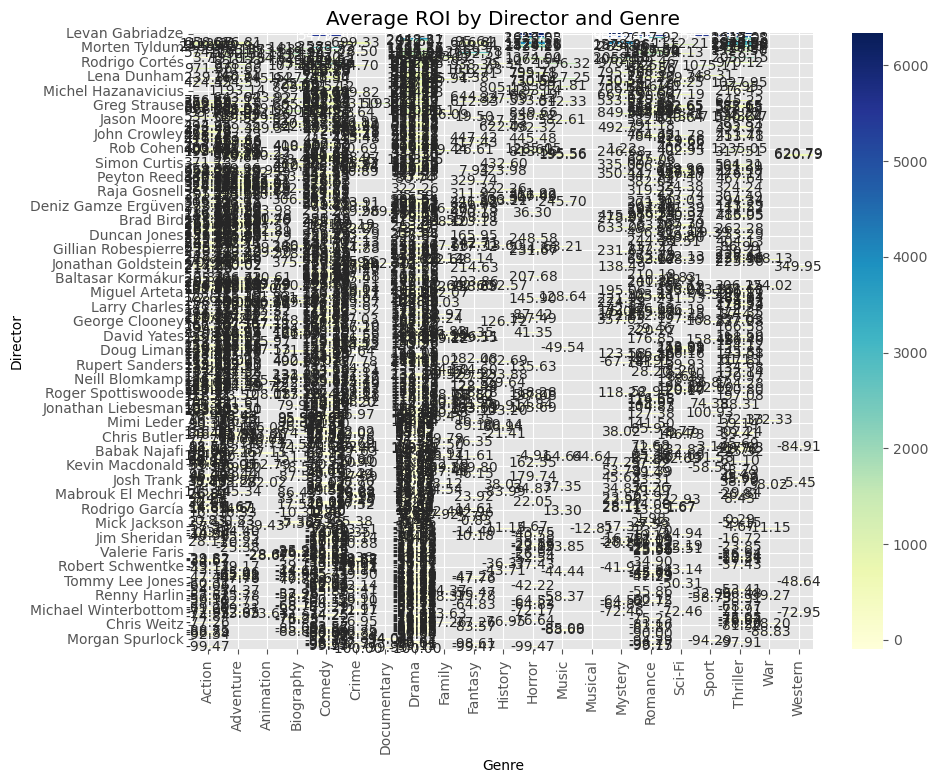

In [137]:
# Create a DataFrame with Director, Genres, and ROI columns
director_genre_roi_df = merged_director_budget_runtime[['primary_name', 'genres_x', 'roi']]

# Split the genres into separate rows
director_genre_roi_df['genres_x'] = director_genre_roi_df['genres_x'].str.split(',')

# Create a new DataFrame with each genre in a separate row
director_genre_expanded_df = director_genre_roi_df.explode('genres_x')

# Pivot the data to create a table
pivot_table = director_genre_expanded_df.pivot_table(index='primary_name', columns='genres_x', values='roi', aggfunc='mean')

# Sort the pivot table by directors and genres
sorted_pivot_table = pivot_table.sort_values(by=pivot_table.columns.tolist(), ascending=[False] * len(pivot_table.columns))

# Sort the pivot table by ROI for each director
sorted_pivot_table = sorted_pivot_table.reindex(sorted_pivot_table.mean(axis=1).sort_values(ascending=False).index)

# Create a heatmap to visualize the sorted pivot table
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_table, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Average ROI by Director and Genre')
plt.xlabel('Genre')
plt.ylabel('Director')
plt.show()


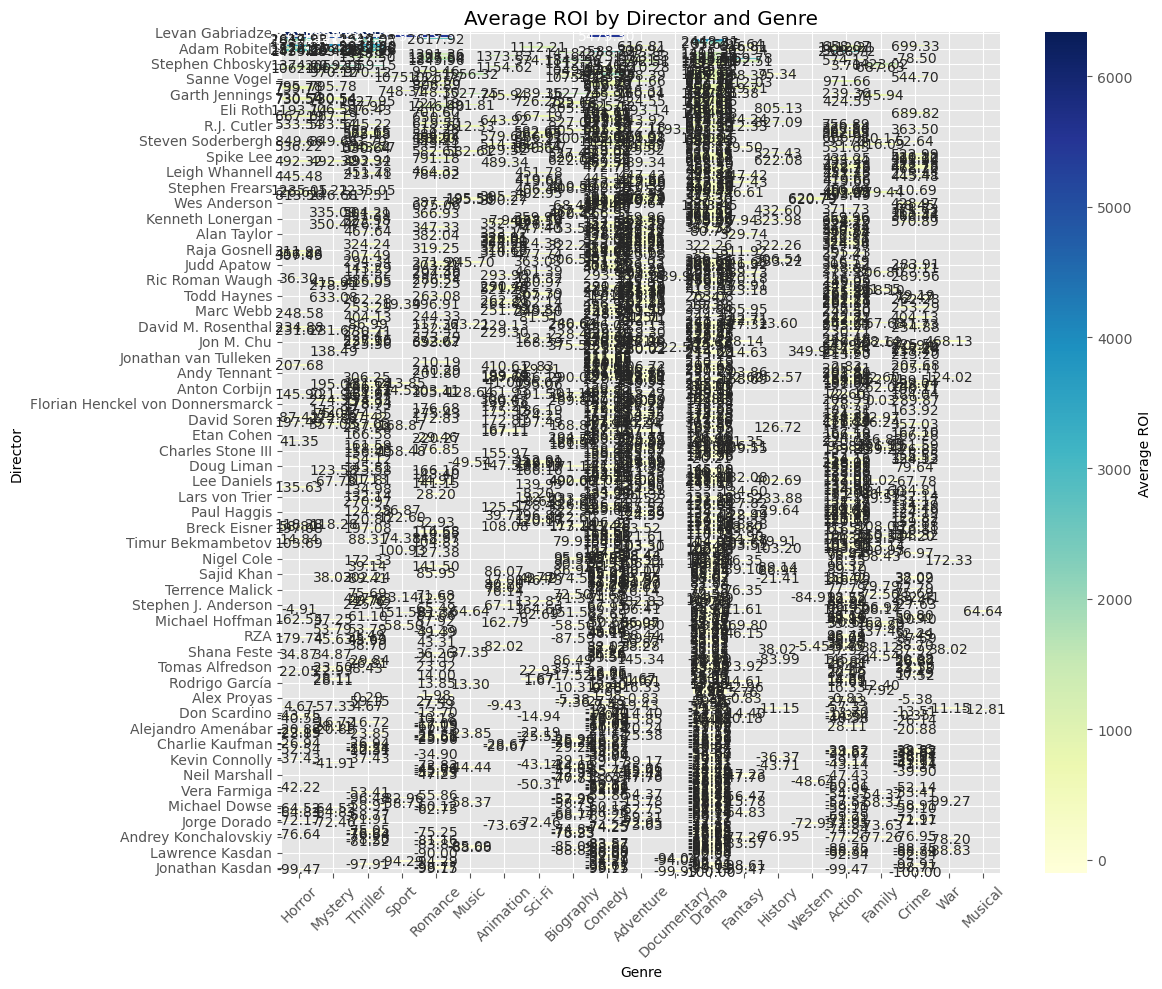

In [138]:


# Reorder the directors based on their average ROI
director_order = sorted_pivot_table.mean(axis=1).sort_values(ascending=False).index
sorted_pivot_table = sorted_pivot_table.reindex(director_order)

# Reorder the genres based on their average ROI
genre_order = sorted_pivot_table.mean().sort_values(ascending=False).index
sorted_pivot_table = sorted_pivot_table[genre_order]

# Create a heatmap to visualize the sorted pivot table
plt.figure(figsize=(12, 10))
sns.heatmap(sorted_pivot_table, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Average ROI'})

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Increase font size of labels and annotations
plt.tick_params(axis='both', which='major', labelsize=10)

plt.title('Average ROI by Director and Genre')
plt.xlabel('Genre')
plt.ylabel('Director')
plt.tight_layout()
plt.show()


This code will filter the heatmap to show only the top 25 best performing directors and the top 10 best performing genres in terms of ROI. This should give you a clearer view of the highest performing combinations.

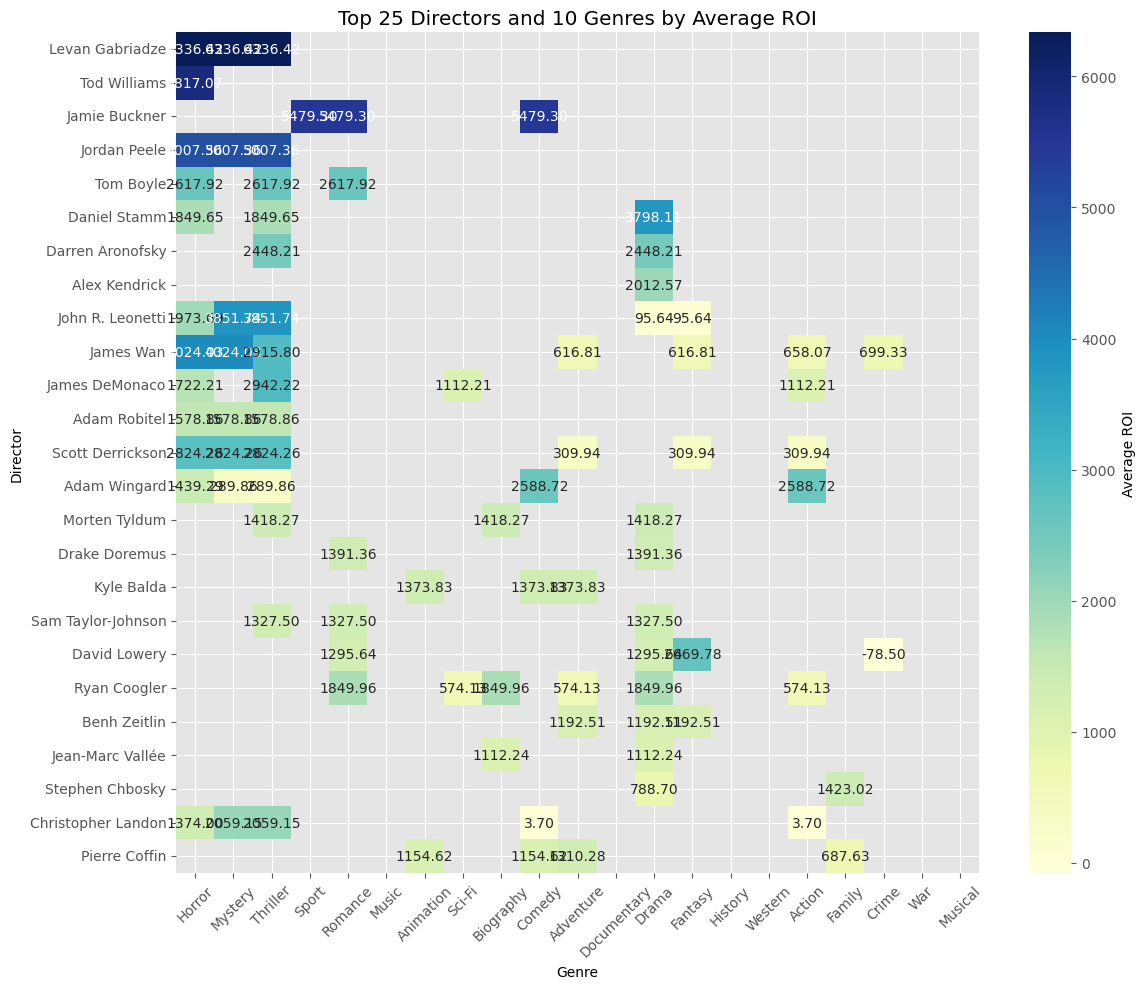

In [139]:
# Reorder the directors based on their average ROI
director_order = sorted_pivot_table.mean(axis=1).sort_values(ascending=False).index
sorted_pivot_table = sorted_pivot_table.reindex(director_order)

# Reorder the genres based on their average ROI
genre_order = sorted_pivot_table.mean().sort_values(ascending=False).index
sorted_pivot_table = sorted_pivot_table[genre_order]

# Get the top 25 directors and top 10 genres
top_directors = sorted_pivot_table.head(25)
top_genres = sorted_pivot_table[top_directors.columns].mean(axis=0).head(10)

# Create a heatmap with the limited data
plt.figure(figsize=(12, 10))
sns.heatmap(top_directors, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Average ROI'})

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Increase font size of labels and annotations
plt.tick_params(axis='both', which='major', labelsize=10)

plt.title('Top 25 Directors and 10 Genres by Average ROI')
plt.xlabel('Genre')
plt.ylabel('Director')
plt.tight_layout()
plt.show()




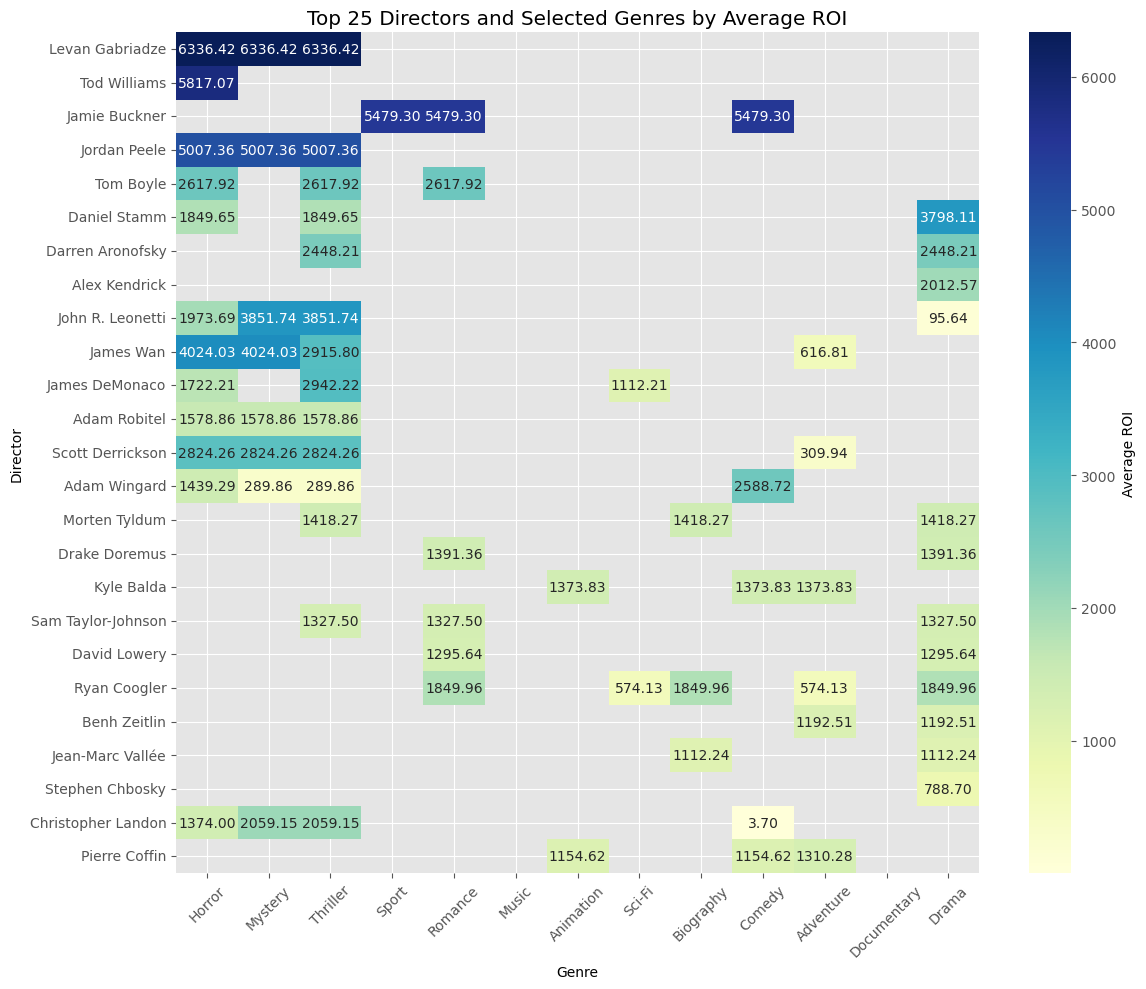

In [140]:
# Reorder the directors based on their average ROI
director_order = sorted_pivot_table.mean(axis=1).sort_values(ascending=False).index
sorted_pivot_table = sorted_pivot_table.reindex(director_order)

# Define the genres you want to include in the graph
desired_genres = ['Horror', 'Mystery', 'Thriller', 'Sport', 'Romance', 'Music', 'Animation', 'Sci-Fi', 'Biography', 'Comedy', 'Adventure', 'Documentary', 'Drama']

# Filter the genres based on the desired list
filtered_genres = [genre for genre in desired_genres if genre in sorted_pivot_table.columns]
filtered_data = sorted_pivot_table.loc[:, filtered_genres]

# Get the top 25 directors
top_directors = filtered_data.head(25)

# Create a heatmap with the limited data
plt.figure(figsize=(12, 10))
sns.heatmap(top_directors, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Average ROI'})

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Increase font size of labels and annotations
plt.tick_params(axis='both', which='major', labelsize=10)

plt.title('Top 25 Directors and Selected Genres by Average ROI')
plt.xlabel('Genre')
plt.ylabel('Director')
plt.tight_layout()
plt.show()


In [141]:
# Group the data by director and count the number of movies for each director
director_movie_count = director_genre_roi_df['primary_name'].value_counts()

# Get the top 10 directors
top_directors = director_genre_expanded_df.groupby('primary_name')['roi'].mean().sort_values(ascending=False).index[:10]

# Select only the top 10 directors' movie counts
top_directors_movie_count = director_movie_count[top_directors]

print(top_directors_movie_count)


primary_name
Levan Gabriadze     1
Tod Williams        1
Jamie Buckner       1
Jordan Peele        1
Tom Boyle           1
Darren Aronofsky    1
James Wan           4
Daniel Stamm        2
Alex Kendrick       2
John R. Leonetti    2
Name: primary_name, dtype: int64


In [142]:
# Calculate the average number of movies made by each director
average_movies_per_director = filtered_merged_df.groupby('primary_name')['movie_id'].count().mean()

# Calculate the median number of movies made by each director
median_movies_per_director = filtered_merged_df.groupby('primary_name')['movie_id'].count().median()

# Calculate the highest number of movies made by a single director
highest_movies_by_director = filtered_merged_df.groupby('primary_name')['movie_id'].count().max()

# Print the results
print(f"The average number of movies made by each director is: {average_movies_per_director:.2f}")
print(f"The median number of movies made by each director is: {median_movies_per_director:.2f}")
print(f"The highest number of movies made by a single director is: {highest_movies_by_director}")


The average number of movies made by each director is: 1.83
The median number of movies made by each director is: 1.00
The highest number of movies made by a single director is: 39


The directors we see as best in terms of bringing ROI to the movies they direct have produced one or two films in our database. But this is consistent with the statistical average and median.  So I am pretty confident this is a reliable analysis to make a recomendation.

C:\Users\rafvr\AppData\Local\Temp\ipykernel_18712\2528766827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  director_genre_roi_df['genres_x'] = director_genre_roi_df['genres_x'].str.split(',')


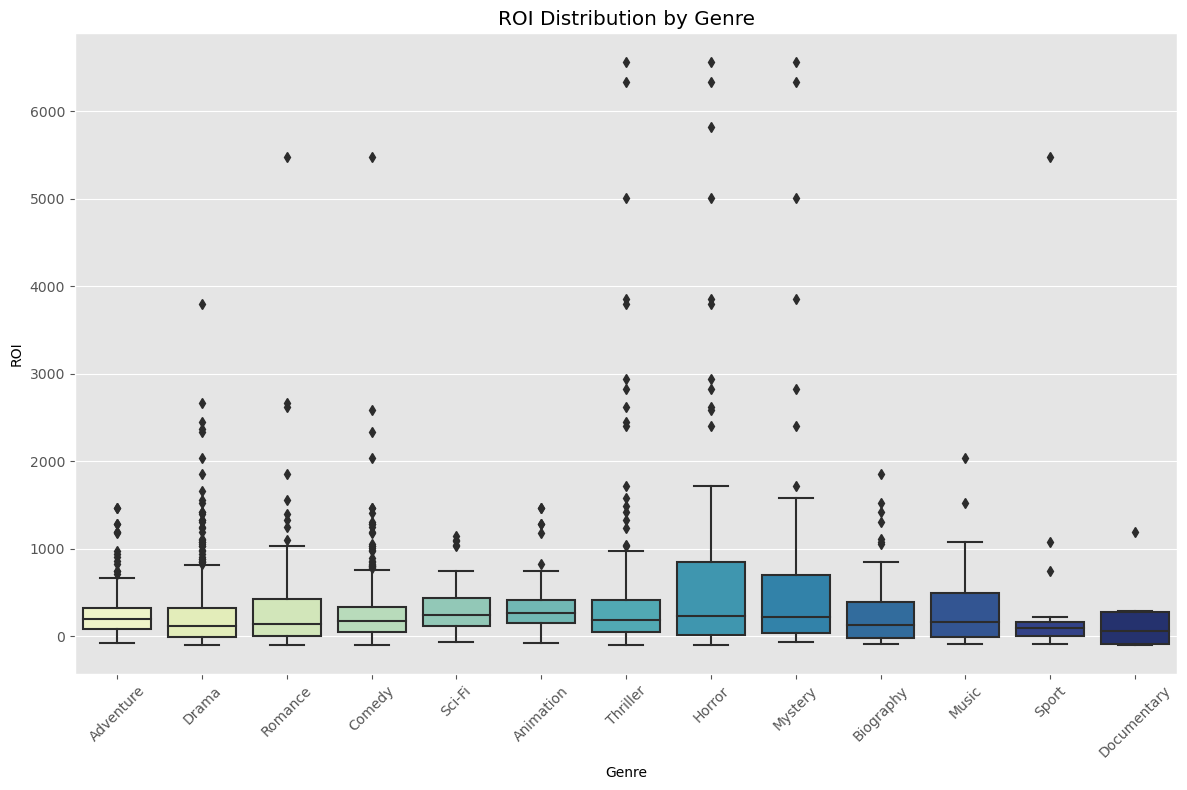

In [143]:
# Create a DataFrame with Director, Genres, and ROI columns
director_genre_roi_df = merged_director_budget_runtime[['primary_name', 'genres_x', 'roi']]

# Split the genres into separate rows
director_genre_roi_df['genres_x'] = director_genre_roi_df['genres_x'].str.split(',')

# Create a new DataFrame with each genre in a separate row
director_genre_expanded_df = director_genre_roi_df.explode('genres_x')

# Filter the genres based on the desired list
desired_genres = ['Horror', 'Mystery', 'Thriller', 'Sport', 'Romance', 'Music', 'Animation', 'Sci-Fi', 'Biography', 'Comedy', 'Adventure', 'Documentary', 'Drama']
filtered_genres = [genre for genre in desired_genres if genre in director_genre_expanded_df['genres_x'].unique()]
filtered_genre_data = director_genre_expanded_df[director_genre_expanded_df['genres_x'].isin(filtered_genres)]

# Create box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_genre_data, x='genres_x', y='roi', palette='YlGnBu')
plt.title('ROI Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Exploring ROI distribution per Genre through box plots, ignoring outliers:

C:\Users\rafvr\AppData\Local\Temp\ipykernel_18712\1243599915.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  director_genre_roi_df['genres_x'] = director_genre_roi_df['genres_x'].str.split(',')


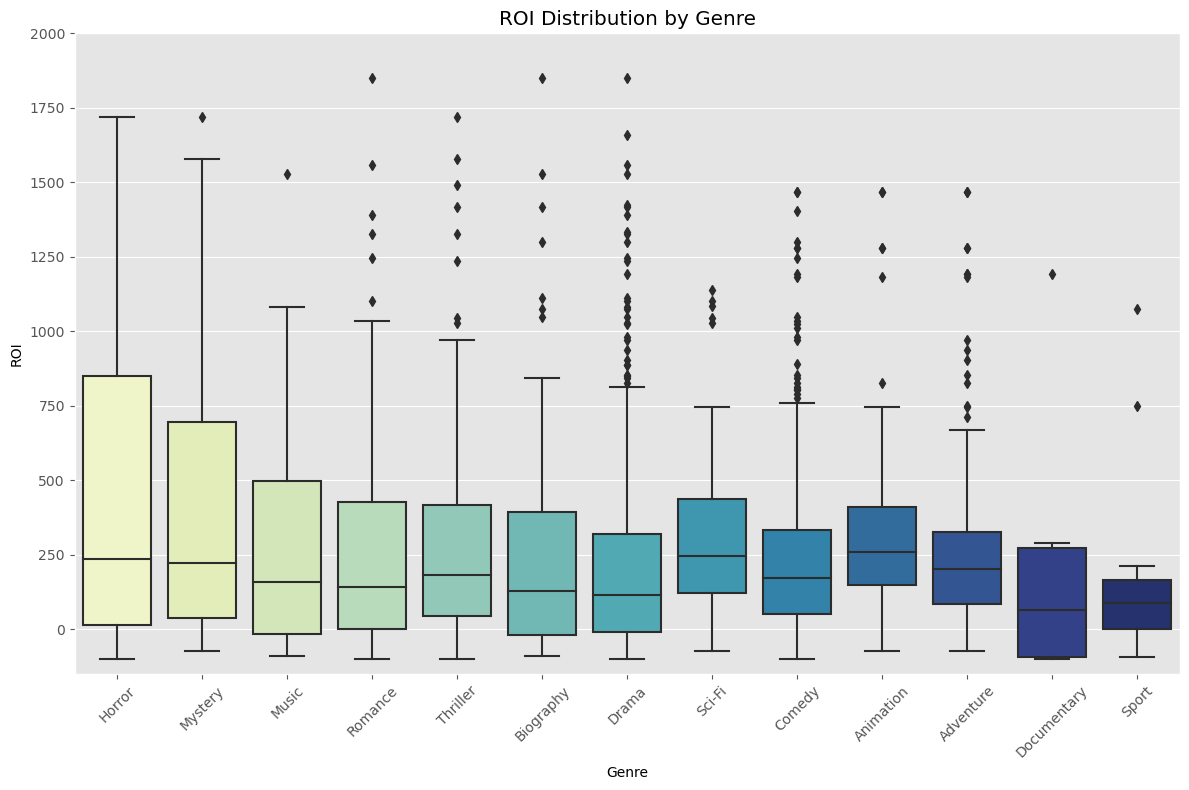

In [144]:

# Create a DataFrame with Director, Genres, and ROI columns
director_genre_roi_df = merged_director_budget_runtime[['primary_name', 'genres_x', 'roi']]

# Split the genres into separate rows
director_genre_roi_df['genres_x'] = director_genre_roi_df['genres_x'].str.split(',')

# Create a new DataFrame with each genre in a separate row
director_genre_expanded_df = director_genre_roi_df.explode('genres_x')

# Define the desired genre order
desired_genre_order = ['Horror', 'Mystery', 'Music', 'Romance', 'Thriller', 'Biography', 'Drama', 'Sci-Fi', 'Comedy', 'Animation', 'Adventure', 'Documentary', 'Sport']

# Filter the DataFrame to include only desired genres
filtered_genre_data = director_genre_expanded_df[director_genre_expanded_df['genres_x'].isin(desired_genre_order)]

# Create a box plot with ordered genres
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_genre_data, x='genres_x', y='roi', order=desired_genre_order, palette='YlGnBu')

# Set y-axis limit to cut down outliers
plt.ylim(-150, 2000)  # Adjust the range as needed

plt.title('ROI Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


To determine the statistical likelihood that a genre will generate the best ROI in film production, we can perform a statistical hypothesis test. One common approach is to use the analysis of variance (ANOVA) test or a Kruskal-Wallis test to compare the ROI distributions among different genres. These tests can help us assess whether there are statistically significant differences in ROI among genres.

Here's a general outline of the steps we can take:

1. **Null Hypothesis (H0):** There is no significant difference in ROI among different genres.
2. **Alternative Hypothesis (H1):** There is a significant difference in ROI among different genres.

3. Choose a significance level (alpha), typically 0.05.
4. Perform the appropriate statistical test (ANOVA or Kruskal-Wallis) to compare the ROI distributions of different genres.
5. If the p-value is less than the chosen significance level (alpha), you can reject the null hypothesis and conclude that there is a significant difference in ROI among at least some genres.
6. Conduct post-hoc tests (Tukey's HSD test for ANOVA or pairwise comparisons for Kruskal-Wallis) to identify which genres have significantly different ROIs.

7. Calculate effect size measures (e.g., Cohen's d) to quantify the magnitude of the differences between genres.
8. Consider other factors that may influence ROI, such as budget, runtime, and release year, by performing regression analyses or other multivariate methods.


Null Hypothesis (H0): There is no significant difference in the distribution of ROI (Return on Investment) among the desired genres (Horror, Mystery, Music, Romance, Thriller, Biography, Drama, Sci-Fi, Comedy, Animation, Adventure, Documentary, Sport).

Alternative Hypothesis (H1): There is a significant difference in the distribution of ROI among the desired genres.

In other words, the null hypothesis assumes that the average ROI for all the desired genres is the same, and any observed differences in the box plot are due to random variation. The alternative hypothesis suggests that the average ROI for at least one genre is different from the others, indicating a potential impact of genre on ROI.

In this code, we calculate the F-statistic and p-value using the scipy.stats.f_oneway() function, which performs the ANOVA test. The p-value indicates the probability of observing the differences in ROI among genres due to random chance. If the p-value is less than our chosen significance level (alpha), set at 0.05, we reject the null hypothesis and conclude that there is a significant difference in ROI distributions among genres.

Lets keep in mind that a low p-value doesn't tell us which specific genres are different from each other; it only indicates that there is a difference somewhere among the groups. If the ANOVA result is significant, we might want to conduct post hoc tests (e.g., Tukey's HSD or Bonferroni correction) to identify which genre pairs are statistically different from each other in terms of ROI.

(Lets also remember that the ANOVA test assumes certain assumptions, including normality and homogeneity of variances. If these assumptions are violated, alternative tests like the Kruskal-Wallis test (a non-parametric equivalent) might be more appropriate)

In [145]:
# Extract data for each genre
horror_roi = filtered_genre_data[filtered_genre_data['genres_x'] == 'Horror']['roi']
mystery_roi = filtered_genre_data[filtered_genre_data['genres_x'] == 'Mystery']['roi']
music_roi = filtered_genre_data[filtered_genre_data['genres_x'] == 'Music']['roi']
romance_roi = filtered_genre_data[filtered_genre_data['genres_x'] == 'Romance']['roi']
thriller_roi = filtered_genre_data[filtered_genre_data['genres_x'] == 'Thriller']['roi']
biography_roi = filtered_genre_data[filtered_genre_data['genres_x'] == 'Biography']['roi']
drama_roi = filtered_genre_data[filtered_genre_data['genres_x'] == 'Drama']['roi']
scifi_roi = filtered_genre_data[filtered_genre_data['genres_x'] == 'Sci-Fi']['roi']
comedy_roi = filtered_genre_data[filtered_genre_data['genres_x'] == 'Comedy']['roi']
animation_roi = filtered_genre_data[filtered_genre_data['genres_x'] == 'Animation']['roi']
adventure_roi = filtered_genre_data[filtered_genre_data['genres_x'] == 'Adventure']['roi']
documentary_roi = filtered_genre_data[filtered_genre_data['genres_x'] == 'Documentary']['roi']
sport_roi = filtered_genre_data[filtered_genre_data['genres_x'] == 'Sport']['roi']

# Perform ANOVA test
anova_result = stats.f_oneway(horror_roi, mystery_roi, music_roi, romance_roi, thriller_roi, biography_roi,
                              drama_roi, scifi_roi, comedy_roi, animation_roi, adventure_roi, documentary_roi,
                              sport_roi)

# Print ANOVA result
print("ANOVA Result:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

# Check if the p-value is less than the significance level (alpha)
alpha = 0.05
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in ROI among genres.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ROI among genres.")


ANOVA Result:
F-statistic: 8.703410383411782
p-value: 2.447358336397178e-16
Reject the null hypothesis: There is a significant difference in ROI among genres.


Since the ANOVA test indicates a significant difference in ROI among genres, lets now proceed with conducting Tukey's HSD test to identify which pairs of genres have significantly different ROIs.

Significant Pairwise Comparisons:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1      group2    meandiff p-adj    lower      upper   reject
--------------------------------------------------------------------
  Adventure   Animation   75.6481 0.9994   -194.835  346.1313  False
  Adventure   Biography    8.2812    1.0   -246.812  263.3745  False
  Adventure      Comedy   16.8252    1.0  -157.6354  191.2858  False
  Adventure Documentary   -20.788    1.0  -901.5316  859.9556  False
  Adventure       Drama   -7.9427    1.0  -172.7819  156.8964  False
  Adventure      Horror  618.6496    0.0   341.5888  895.7104   True
  Adventure       Music   93.4994    1.0  -380.2383  567.2372  False
  Adventure     Mystery  447.0477    0.0    152.757  741.3384   True
  Adventure     Romance   82.5121 0.9939  -148.8067   313.831  False
  Adventure      Sci-Fi   45.4974    1.0   -214.648  305.6429  False
  Adventure       Sport  198.3302  0.989  -321.6387   718.299  False


<Figure size 1000x600 with 0 Axes>

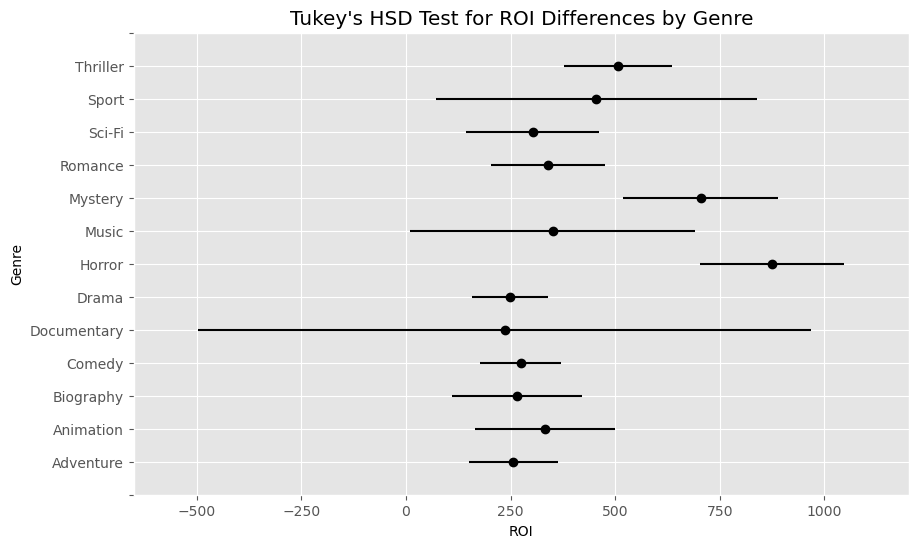

In [146]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(filtered_genre_data['roi'], filtered_genre_data['genres_x'], alpha=0.05)

# Display significant pairwise comparisons
print("Significant Pairwise Comparisons:")
print(tukey_results)

# Plot Tukey's HSD results
plt.figure(figsize=(10, 6))
tukey_results.plot_simultaneous(xlabel='ROI', ylabel='Genre')
plt.title("Tukey's HSD Test for ROI Differences by Genre")
plt.show()


Based on the statistical analysis conducted on the movie data, we can confidently confirm that the genres of Horror, Mystery, and Thriller are the most promising choices for movie production. This conclusion aligns with what we observed in the raw data: these genres exhibit the least risk for financial losses and the highest likelihood for achieving a substantial Return on Investment (ROI). Therefore, when considering movie production strategies, focusing on Horror, Mystery, and Thriller genres offers a strategic advantage in terms of financial success and ROI optimization.

I will not recommend the Documentary because, just like it has a high ROI record, it may also have a potential loss of even a negative 500 ROI. Seems wise to say away from such risk.

In [147]:
director_genre_roi_df

primary_name                       genres_x    roi
0        Walter Salles    [Adventure, Drama, Romance] -62.75
1          Ben Stiller     [Adventure, Comedy, Drama] 106.44
2          Scott Frank         [Action, Crime, Drama] 121.82
3      Colin Trevorrow    [Action, Adventure, Sci-Fi] 666.91
4       Bruce Robinson                [Comedy, Drama] -52.12
..                 ...                            ...    ...
936       Karyn Kusama         [Action, Crime, Drama] -59.10
937  Steven Soderbergh       [Drama, Horror, Mystery] 849.66
938  Charles Stone III                [Comedy, Sport] 158.48
939          Spike Lee      [Biography, Crime, Drama] 520.12
940       Andrew Hyatt  [Adventure, Biography, Drama] 410.59

[941 rows x 3 columns]

In [148]:
# Making sure these men are alive and can be used for a recommendation

directors_to_check = [
    "Levan Gabriadze",
    "Tod Williams",
    "Jordan Peele",
    "Tom Boyle",
    "Daniel Stamm",
    "Darren Aronofsky",
    "John R. Leonetti",
    "James Wan",
    "James DeMonaco",
    "Adam Robitel",
    "Scott Derrickson",
    "Adam Wingard",
    "Morten Tyldum",
    "Sam Taylor-Johnson",
    "Christopher Landon"
]

for director in directors_to_check:
    director_info = merged_director_budget_runtime[merged_director_budget_runtime['primary_name'] == director]
    
    if len(director_info) > 0:
        birth_year = director_info['birth_year'].iloc[0]
        death_year = director_info['death_year'].iloc[0]
        if pd.notna(birth_year) and pd.isna(death_year):
            status = "Alive"
        else:
            status = "Not Alive"
        print(f"{director}: {status}")
    else:
        print(f"{director}: Not found in the DataFrame")


Levan Gabriadze: Alive
Tod Williams: Alive
Jordan Peele: Alive
Tom Boyle: Alive
Daniel Stamm: Alive
Darren Aronofsky: Alive
John R. Leonetti: Alive
James Wan: Alive
James DeMonaco: Alive
Adam Robitel: Alive
Scott Derrickson: Alive
Adam Wingard: Alive
Morten Tyldum: Alive
Sam Taylor-Johnson: Alive
Christopher Landon: Alive


--------------------

Director's Top Genres: Lets create a bar plot to show the top genres for each director in terms of average ROI. This can help us identify which genres are more successful for different directors.

C:\Users\rafvr\AppData\Local\Temp\ipykernel_18712\3890661111.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  director_genre_roi_df['genres_x'] = director_genre_roi_df['genres_x'].str.split(',')


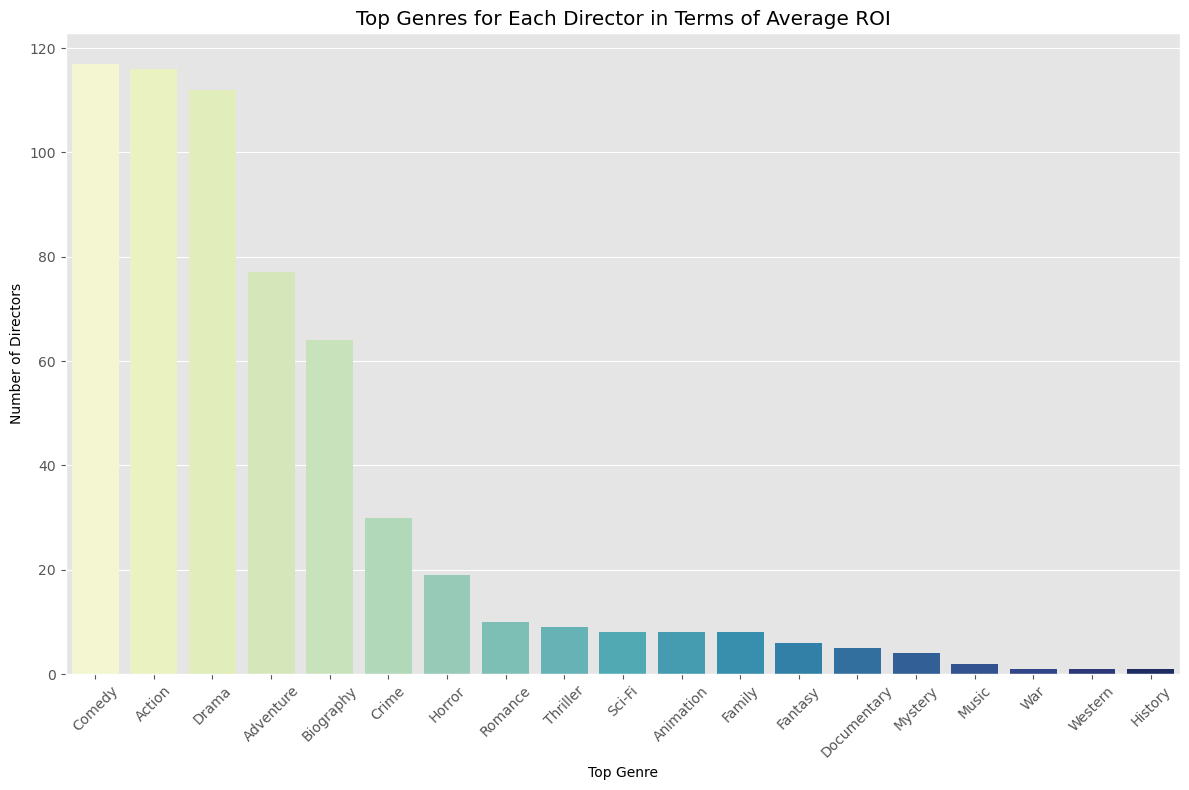

In [149]:

# Create a DataFrame with Director, Genres, and ROI columns
director_genre_roi_df = merged_director_budget_runtime[['primary_name', 'genres_x', 'roi']]

# Split the genres into separate rows
director_genre_roi_df['genres_x'] = director_genre_roi_df['genres_x'].str.split(',')

# Create a new DataFrame with each genre in a separate row
director_genre_expanded_df = director_genre_roi_df.explode('genres_x')

# Pivot the data to create a table
pivot_table = director_genre_expanded_df.pivot_table(index='primary_name', columns='genres_x', values='roi', aggfunc='mean')

# Calculate the top genre for each director
top_genre_for_director = pivot_table.idxmax(axis=1)

# Count the occurrences of each top genre
top_genre_counts = top_genre_for_director.value_counts()

# Sort the top genres by count
sorted_top_genres = top_genre_counts.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_top_genres.index, y=sorted_top_genres.values, palette='YlGnBu')

plt.title("Top Genres for Each Director in Terms of Average ROI")
plt.xlabel("Top Genre")
plt.ylabel("Number of Directors")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Budget vs. ROI by Director: Create scatter plots to explore the relationship between budget and ROI for each director. This can help identify directors who consistently produce high-ROI films regardless of budget.

C:\Users\rafvr\AppData\Local\Temp\ipykernel_18712\3800836058.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


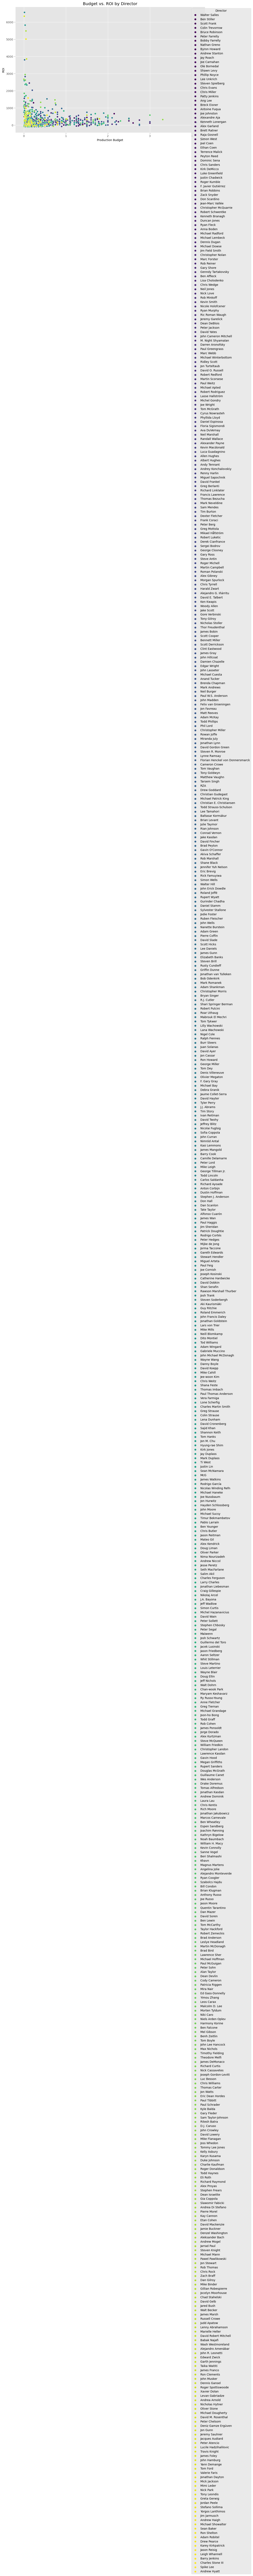

In [150]:
# Create scatter plots for Budget vs. ROI for each director
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='production_budget', y='roi', data=merged_director_budget_runtime, hue='primary_name', palette='viridis')

# Add a legend with title
legend = scatter.legend(title='Director', loc='upper right', bbox_to_anchor=(1.25, 1))

plt.title('Budget vs. ROI by Director')
plt.xlabel('Production Budget')
plt.ylabel('ROI')
plt.tight_layout()
plt.show()


In [151]:
# Calculate ROI for each director
merged_director_budget_runtime['roi'] = (merged_director_budget_runtime['worldwide_gross'] - merged_director_budget_runtime['production_budget']) / merged_director_budget_runtime['production_budget']

# Calculate mean ROI for each director
mean_roi_by_director = merged_director_budget_runtime.groupby('primary_name')['roi'].mean()

# Get the top 10 directors with the highest mean ROI
top_directors_roi = mean_roi_by_director.nlargest(10)

# Display the top 10 directors
print(top_directors_roi)


primary_name
Levan Gabriadze    63.36
Tod Williams       58.17
Jamie Buckner      54.79
Jordan Peele       50.07
Tom Boyle          26.18
Darren Aronofsky   24.48
James Wan          23.41
Alex Kendrick      20.13
John R. Leonetti   19.74
Daniel Stamm       18.50
Name: roi, dtype: float64


Pie Chart of Genre Distribution: A pie chart to show the distribution of genres in the dataset. This can provide a clear visual of the genre composition of the movies.

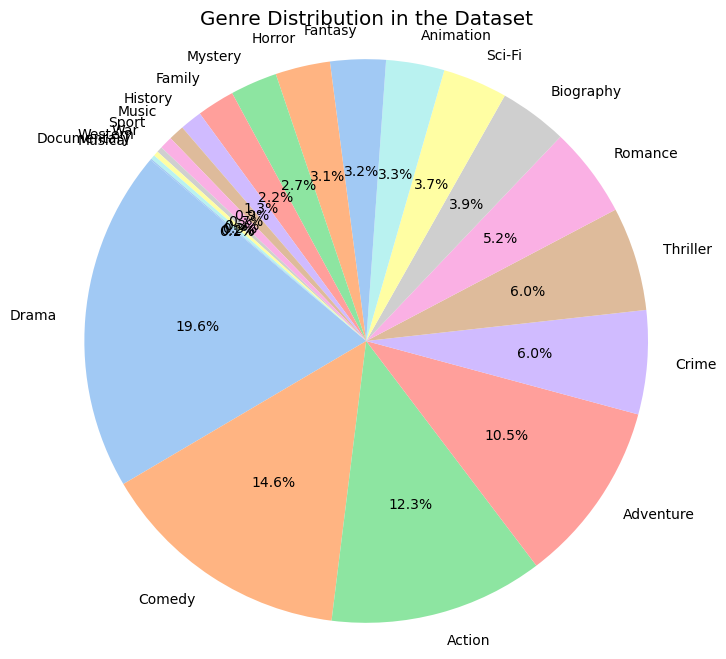

In [152]:
# Count the occurrences of each genre
genre_counts = director_genre_roi_df['genres_x'].explode().value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Genre Distribution in the Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

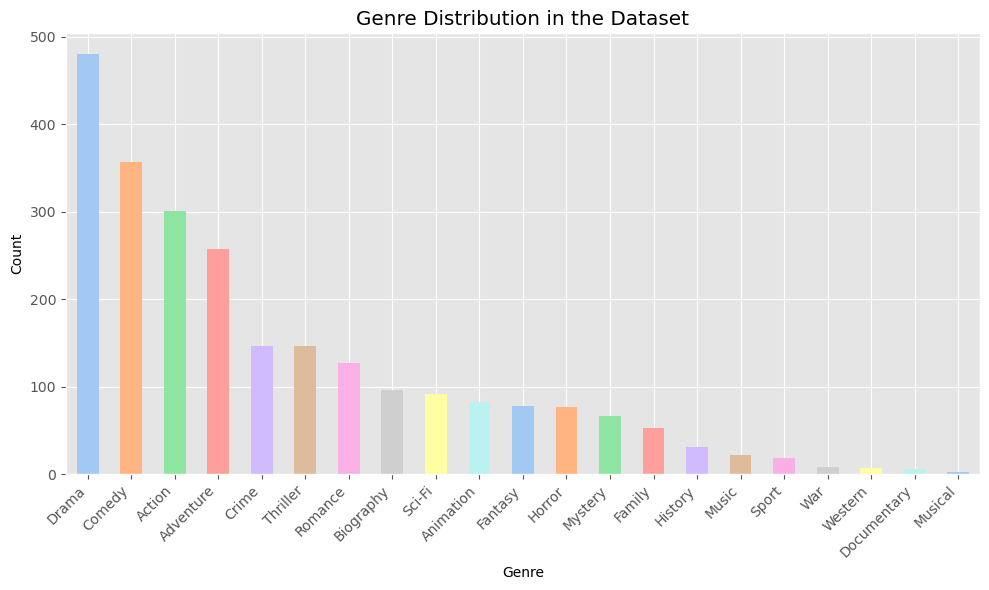

In [153]:
# Count the occurrences of each genre
genre_counts = director_genre_roi_df['genres_x'].explode().value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color=sns.color_palette('pastel'))
plt.title('Genre Distribution in the Dataset')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [154]:
# Calculate the average ROI for each genre
genre_avg_roi = mov_bas_rat2.groupby('genres')['roi'].mean()

# Rank the genres based on average ROI
ranked_genres = genre_avg_roi.sort_values(ascending=False)

# Print the ranked genres
print(ranked_genres)


genres
Horror,Mystery,Thriller   3833.82
Horror,Romance,Thriller   2617.92
Horror                    2422.28
Comedy,Romance,Sport      1822.41
Adventure,Horror          1193.14
                            ...  
Biography,Drama,War        -88.83
Family                     -96.04
Documentary,War            -98.14
Action,Drama,War           -99.27
Action,Adventure           -99.74
Name: roi, Length: 193, dtype: float64


In [155]:
director_genre_roi_df

primary_name                       genres_x    roi
0        Walter Salles    [Adventure, Drama, Romance] -62.75
1          Ben Stiller     [Adventure, Comedy, Drama] 106.44
2          Scott Frank         [Action, Crime, Drama] 121.82
3      Colin Trevorrow    [Action, Adventure, Sci-Fi] 666.91
4       Bruce Robinson                [Comedy, Drama] -52.12
..                 ...                            ...    ...
936       Karyn Kusama         [Action, Crime, Drama] -59.10
937  Steven Soderbergh       [Drama, Horror, Mystery] 849.66
938  Charles Stone III                [Comedy, Sport] 158.48
939          Spike Lee      [Biography, Crime, Drama] 520.12
940       Andrew Hyatt  [Adventure, Biography, Drama] 410.59

[941 rows x 3 columns]

In [156]:
# Filter movies with ROI greater than 2000
high_roi_movies = mov_bas_rat2[mov_bas_rat2['roi'] > 2000]

# Sort by ROI in descending order
high_roi_movies = high_roi_movies.sort_values(by='roi', ascending=False)

# Display movies, genres, and ROI
for index, row in high_roi_movies.iterrows():
    genres_list = [genre.strip() for genre in row['genres'].split(',')]  # Split and clean genres
    genres = ', '.join(genres_list)  # Join cleaned genres with a comma
    print(f"Movie: {row['primary_title']}\nGenres: {genres}\nROI: {row['roi']:.2f}\n")


Movie: The Gallows
Genres: Horror, Mystery, Thriller
ROI: 41556.47

Movie: The Devil Inside
Genres: Horror
ROI: 10075.95

Movie: Insidious
Genres: Horror, Mystery, Thriller
ROI: 6558.06

Movie: Unfriended
Genres: Horror, Mystery, Thriller
ROI: 6336.42

Movie: Paranormal Activity 2
Genres: Horror
ROI: 5817.07

Movie: Split
Genres: Comedy, Romance, Sport
ROI: 5479.30

Movie: Get Out
Genres: Horror, Mystery, Thriller
ROI: 5007.36

Movie: Chernobyl Diaries
Genres: Horror, Mystery, Thriller
ROI: 4141.17

Movie: Paranormal Activity 3
Genres: Horror, Mystery, Thriller
ROI: 4040.80

Movie: Annabelle
Genres: Horror, Mystery, Thriller
ROI: 3851.74

Movie: The Last Exorcism
Genres: Drama, Horror, Thriller
ROI: 3798.11

Movie: Dangal
Genres: Action, Biography, Drama
ROI: 3001.63

Movie: The Purge
Genres: Horror, Thriller
ROI: 2942.22

Movie: Lights Out
Genres: Drama
ROI: 2876.13

Movie: Sinister
Genres: Horror, Mystery, Thriller
ROI: 2824.26

Movie: Paranormal Activity 4
Genres: Horror, Mystery, T

As of now we have a solid recommendation for Horror, Thriller and Mystery and a combined genre, or as individual genres, to maximize our film ROI. Also, we have a list of directors to recommend, being Levan Gabriadze, Tod Williams and Jordan Peele the best candidates.  Let's now look at other meters to complement our recommendations.

<<------ Review till here

Is there a runtime length when ROI is best?  Let's explore.

Let's see some stats:

In [157]:
# Filter out rows with missing values in specified columns
filtered_data = mov_bas_rat2.dropna(subset=['runtime_minutes', 'roi'])

# Calculate correlation coefficients for different time intervals
interval_sizes = np.arange(10, 151, 10)  # Interval sizes from 10 to 150
correlation_coefficients = []

for interval_size in interval_sizes:
    intervals = filtered_data['runtime_minutes'].apply(lambda x: int(x / interval_size))
    mean_roi_by_interval = filtered_data.groupby(intervals)['roi'].mean()
    interval_indices = np.arange(len(mean_roi_by_interval))
    corr_coeff, _ = pearsonr(interval_indices, mean_roi_by_interval)
    correlation_coefficients.append(corr_coeff)

# Calculate and display mean and median of correlation coefficients
mean_corr = np.mean(correlation_coefficients)
median_corr = np.median(correlation_coefficients)
print(f"Mean Correlation Coefficient: {mean_corr:.4f}")
print(f"Median Correlation Coefficient: {median_corr:.4f}")

Mean Correlation Coefficient: -0.4952
Median Correlation Coefficient: -0.8066


The mean correlation coefficient of approximately -0.4952 suggests a moderate negative correlation between runtime and ROI across the different interval sizes. This implies that, on average, as the runtime of a movie increases, the ROI tends to decrease to some extent.

The median correlation coefficient of approximately -0.8066 suggests a stronger negative correlation. The fact that the median is more negative than the mean could indicate that there might be some outliers or extreme values influencing the distribution of correlation coefficients.

This not only shows that shorter films are a better investment, and that around 80 minutes is the ideal length for ROI on film, but that longer than 100 minute productions have a dangerous pitfall. 

This is telling us that a film of between 60 and 80 minutes is best for ROI.

Let's see how this hold for the genre of Horror, being the best for ROI as per the analisys shown above:

Take note: Keep Horror and Documentary films at slightly above 80 minutes. Do not extend to 100 minutes. That is where the biggest loss of ROI is. 

Now we see a different picture:<br><br>
<li>Action, Adventure, Sci-Fi film should be produced in longer feature lengths. 90 and 150 minutes seem better choices.
<li>Action,Crime,Thriller should be best of 130 minutes in length. But no more. 150 minutes will be an ROI loss.
<li>Adventure,Drama,Sport films are clearly best produced at 90 minutes of length.

We also see that the Action, Adventure, Sci-Fi combination in longer feature lengths presents the least risk in ROI. 

However, a much greater ROI, measured in percentage, is achieved with the right length Horror and Documentary films.

But the Horror, Mystery, Thriller seems like the absolute best. The ROI is over 5000% percent at about 85 minutes of length, and keeps at quite a high level at feature films of 100 or even 120 minutes runtime.

-----

Let's re-make the ROI vs runtime plot. This time eliminate the top outlier and make the ROI axis measure only up to 7000.

In [161]:
# Calculate the mean, median, and mode of ROI
roi_mean = np.mean(filtered_data['roi'])
roi_median = np.median(filtered_data['roi'])
roi_mode = stats.mode(filtered_data['roi'])[0][0]

# Calculate the mean, median, and mode of runtime
runtime_mean = np.mean(filtered_data['runtime_minutes'])
runtime_median = np.median(filtered_data['runtime_minutes'])
runtime_mode = stats.mode(filtered_data['runtime_minutes'])[0][0]

print("ROI Measures:")
print("Mean:", roi_mean)
print("Median:", roi_median)
print("Mode:", roi_mode)

print("\nRuntime Measures:")
print("Mean:", runtime_mean)
print("Median:", runtime_median)
print("Mode:", runtime_mode)

ROI Measures:
Mean: 345.5546027787163
Median: 147.55028363636364
Mode: -100.0

Runtime Measures:
Mean: 108.67334494773519
Median: 106.0
Mode: 100.0


C:\Users\rafvr\AppData\Local\Temp\ipykernel_18712\4220136409.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  roi_mode = stats.mode(filtered_data['roi'])[0][0]
C:\Users\rafvr\AppData\Local\Temp\ipykernel_18712\4220136409.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this

In [162]:
# Filter out rows with missing values in 'runtime_minutes' or 'ROI'
filtered_data = mov_bas_rat2.dropna(subset=['runtime_minutes', 'roi'])

# Exclude the top outlier in ROI
filtered_data = filtered_data[filtered_data['roi'] < filtered_data['roi'].max()]

# Calculate the mean, median, and mode of ROI
roi_mean = np.mean(filtered_data['roi'])
roi_median = np.median(filtered_data['roi'])
roi_mode = stats.mode(filtered_data['roi'])[0][0]

# Calculate the mean, median, and mode of runtime
runtime_mean = np.mean(filtered_data['runtime_minutes'])
runtime_median = np.median(filtered_data['runtime_minutes'])
runtime_mode = stats.mode(filtered_data['runtime_minutes'])[0][0]

C:\Users\rafvr\AppData\Local\Temp\ipykernel_18712\2170660088.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  roi_mode = stats.mode(filtered_data['roi'])[0][0]
C:\Users\rafvr\AppData\Local\Temp\ipykernel_18712\2170660088.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid th

This begs the question: what is, then, the best Runtime for improving our chances to maximize our ROI?

In [164]:
# Define the range of runtime values to analyze
runtime_range = range(0, 200, 10)  # Example: Analyzing 10-minute intervals

In [165]:
# Create an empty DataFrame to store the average ROI and profit for each runtime range
runtime_analysis = pd.DataFrame(columns=['Runtime Range', 'Average ROI', 'Average Profit'])

In [166]:
# Iterate over the runtime ranges
for i in range(len(runtime_range) - 1):
    # Select the movies within the current runtime range
    selected_movies = filtered_data[
        (filtered_data['runtime_minutes'] >= runtime_range[i]) &
        (filtered_data['runtime_minutes'] < runtime_range[i + 1])
    ]

    # Calculate the average ROI and profit for the selected movies
    avg_roi = selected_movies['roi'].mean()
    avg_profit = selected_movies['profit'].mean()

    # Add the runtime range and average ROI/profit to the DataFrame
    runtime_analysis = runtime_analysis.append({
        'Runtime Range': f'{runtime_range[i]}-{runtime_range[i + 1]}',
        'Average ROI': avg_roi,
        'Average Profit': avg_profit
    }, ignore_index=True)

C:\Users\rafvr\AppData\Local\Temp\ipykernel_18712\672609245.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  runtime_analysis = runtime_analysis.append({
C:\Users\rafvr\AppData\Local\Temp\ipykernel_18712\672609245.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  runtime_analysis = runtime_analysis.append({
C:\Users\rafvr\AppData\Local\Temp\ipykernel_18712\672609245.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  runtime_analysis = runtime_analysis.append({
C:\Users\rafvr\AppData\Local\Temp\ipykernel_18712\672609245.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  runtime_analysis = runtime_analysis.append({
C:\Users\raf

In [167]:
# Sort the DataFrame by average ROI in descending order
runtime_analysis = runtime_analysis.sort_values('Average ROI', ascending=False)

In [168]:
# Print the best runtime range for ROI
best_runtime_roi = runtime_analysis.iloc[0]['Runtime Range']
print(f'Best Runtime Range for ROI: {best_runtime_roi}')

# Sort the DataFrame by average profit in descending order
runtime_analysis = runtime_analysis.sort_values('Average Profit', ascending=False)

# Print the best runtime range for profit
best_runtime_profit = runtime_analysis.iloc[0]['Runtime Range']
print(f'Best Runtime Range for Profit: {best_runtime_profit}')

Best Runtime Range for ROI: 50-60
Best Runtime Range for Profit: 140-150


Now, that is a huge difference. 

In [169]:
# Group the data by average rating and calculate the mean ROI and profit
rating_roi_profit = filtered_data.groupby('averagerating').agg({'roi': 'mean', 'profit': 'mean'}).reset_index()

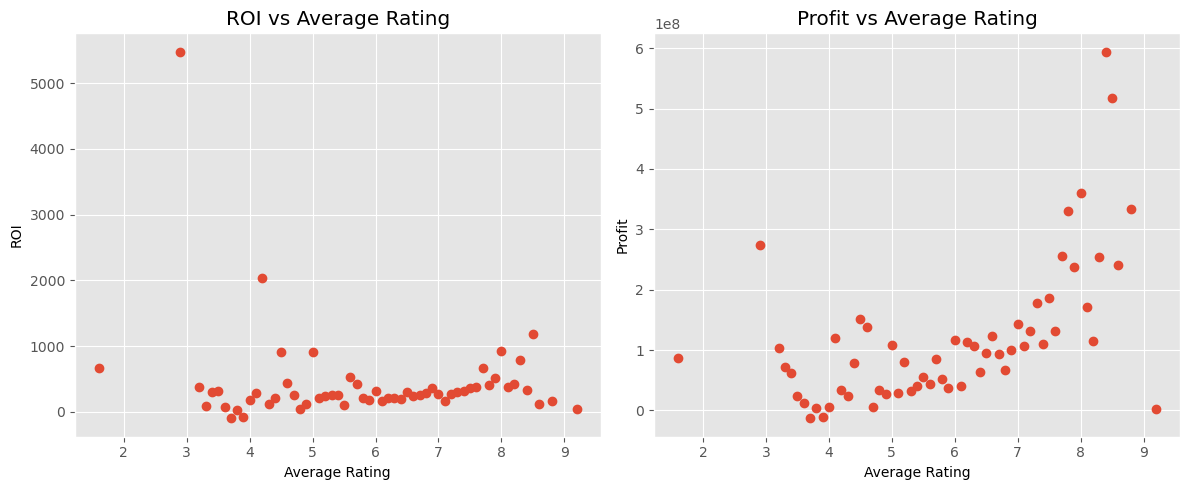

In [170]:
# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROI vs average rating
ax1.plot(rating_roi_profit['averagerating'], rating_roi_profit['roi'], marker='o', linestyle='')
ax1.set_xlabel('Average Rating')
ax1.set_ylabel('ROI')
ax1.set_title('ROI vs Average Rating')

# Plot Profit vs average rating
ax2.plot(rating_roi_profit['averagerating'], rating_roi_profit['profit'], marker='o', linestyle='')
ax2.set_xlabel('Average Rating')
ax2.set_ylabel('Profit')
ax2.set_title('Profit vs Average Rating')

# Display the plots
plt.tight_layout()
plt.show()

I am going to attempt a regression to see if we can get a better picture here.

In [171]:
# Perform linear regression for ROI vs average rating
roi_slope, roi_intercept = np.polyfit(rating_roi_profit['averagerating'], rating_roi_profit['roi'], deg=1)
rating_roi_profit['roi_regression'] = roi_intercept + roi_slope * rating_roi_profit['averagerating']

# Perform linear regression for Profit vs average rating
profit_slope, profit_intercept = np.polyfit(rating_roi_profit['averagerating'], rating_roi_profit['profit'], deg=1)
rating_roi_profit['profit_regression'] = profit_intercept + profit_slope * rating_roi_profit['averagerating']

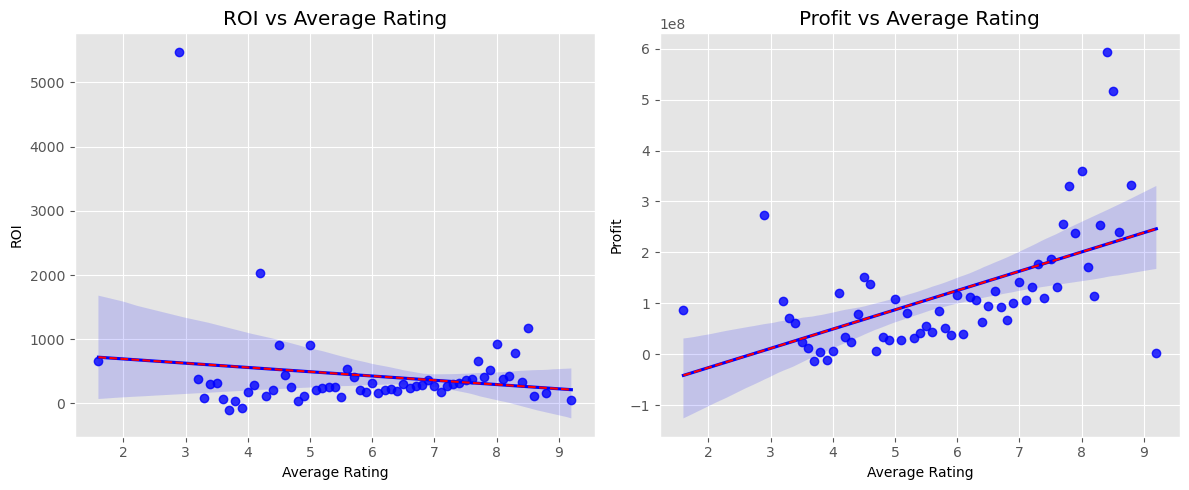

In [172]:
# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROI vs average rating with regression line
sns.regplot(x=rating_roi_profit['averagerating'], y=rating_roi_profit['roi'], ax=ax1, color='b')
ax1.plot(rating_roi_profit['averagerating'], rating_roi_profit['roi_regression'], color='r', linestyle='--')
ax1.set_xlabel('Average Rating')
ax1.set_ylabel('ROI')
ax1.set_title('ROI vs Average Rating')

# Plot Profit vs average rating with regression line
sns.regplot(x=rating_roi_profit['averagerating'], y=rating_roi_profit['profit'], ax=ax2, color='b')
ax2.plot(rating_roi_profit['averagerating'], rating_roi_profit['profit_regression'], color='r', linestyle='--')
ax2.set_xlabel('Average Rating')
ax2.set_ylabel('Profit')
ax2.set_title('Profit vs Average Rating')

# Display the plots
plt.tight_layout()
plt.show()

Why is the correlation between ROI and Average Rating negative? Might be because of an unlucky outlier - one single film got a low average rating but produced a high ROI. The correlation between Profit and Average Rating is clearly positive: the more people like a film the greater the profit it should generate. 

We have another meter to measure this: number of votes. It tells us how popular a film is. Regardless of how people vote on the movie, a greater number of votes means a greater number of views, since people vote on a film they've watched.  

In [173]:
# Group the data by number of votes and calculate the mean ROI and profit
votes_roi_profit = filtered_data.groupby('numvotes').agg({'roi': 'mean', 'profit': 'mean'}).reset_index()

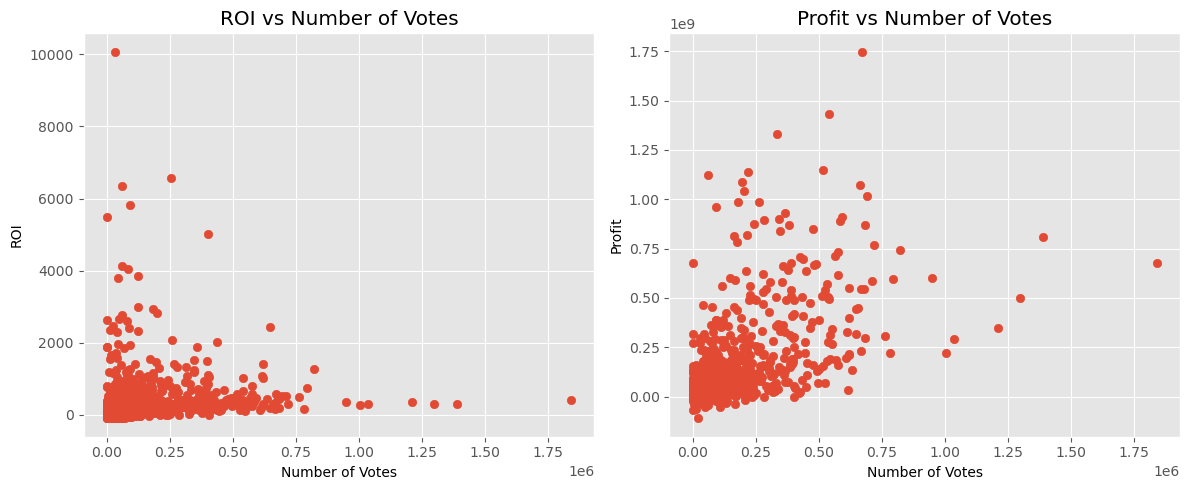

In [174]:
# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot number of votes vs ROI
ax1.scatter(votes_roi_profit['numvotes'], votes_roi_profit['roi'])
ax1.set_xlabel('Number of Votes')
ax1.set_ylabel('ROI')
ax1.set_title('ROI vs Number of Votes')

# Plot number of votes vs profit
ax2.scatter(votes_roi_profit['numvotes'], votes_roi_profit['profit'])
ax2.set_xlabel('Number of Votes')
ax2.set_ylabel('Profit')
ax2.set_title('Profit vs Number of Votes')

# Display the plots
plt.tight_layout()
plt.show()

In [175]:
# Perform linear regression for number of votes vs ROI
roi_slope, roi_intercept = np.polyfit(votes_roi_profit['numvotes'], votes_roi_profit['roi'], deg=1)
votes_roi_profit['roi_regression'] = roi_intercept + roi_slope * votes_roi_profit['numvotes']

# Perform linear regression for number of votes vs profit
profit_slope, profit_intercept = np.polyfit(votes_roi_profit['numvotes'], votes_roi_profit['roi'], deg=1)
votes_roi_profit['profit_regression'] = profit_intercept + profit_slope * votes_roi_profit['numvotes']

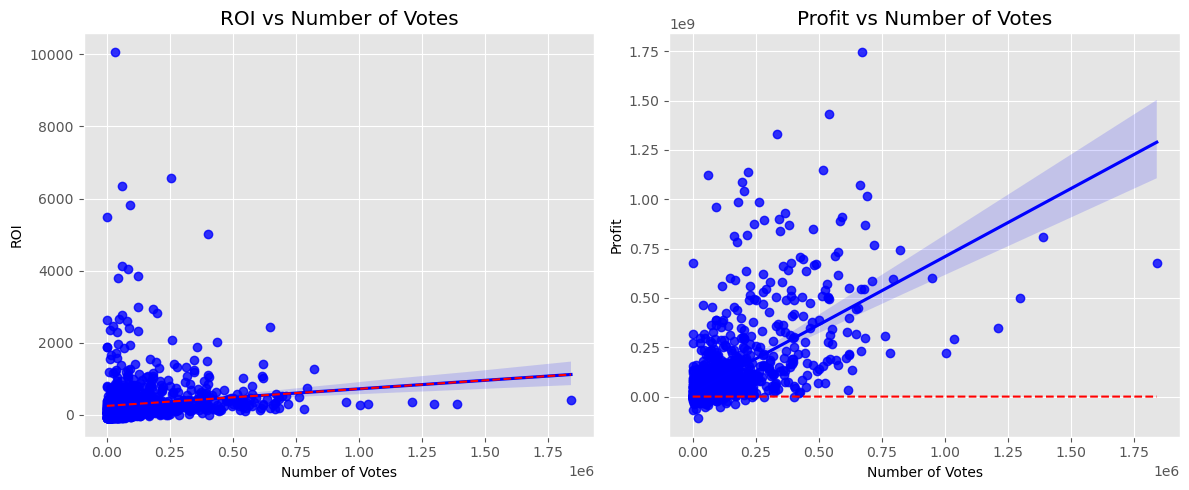

In [176]:
# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot number of votes vs ROI with regression line
sns.regplot(x=votes_roi_profit['numvotes'], y=votes_roi_profit['roi'], ax=ax1, color='b')
ax1.plot(votes_roi_profit['numvotes'], votes_roi_profit['roi_regression'], color='r', linestyle='--')
ax1.set_xlabel('Number of Votes')
ax1.set_ylabel('ROI')
ax1.set_title('ROI vs Number of Votes')

# Plot number of votes vs profit with regression line
sns.regplot(x=votes_roi_profit['numvotes'], y=votes_roi_profit['profit'], ax=ax2, color='b')
ax2.plot(votes_roi_profit['numvotes'], votes_roi_profit['profit_regression'], color='r', linestyle='--')
ax2.set_xlabel('Number of Votes')
ax2.set_ylabel('Profit')
ax2.set_title('Profit vs Number of Votes')

# Display the plots
plt.tight_layout()
plt.show()

Looks like the correlation is positive, but much more acute when it comes to profit that in the case of ROI. This is not caused by an outlier.  Seems like ROI does not improve so significantly with the popularity of the film, even though profit clearly does.

## Directors and Genres

In order to proceed with conclusions and recommendations, let's look at another important meter: directors. Surely a way to make a successful film is to hire good directors and producers.

In [177]:
# bringing our director_movies_df
director_movies_df

NameError: name 'director_movies_df' is not defined

What directors directed Horror,Mystery,Thriller movies?

In [ ]:
# Drop rows with missing values in the 'genres' column
director_movies_df_cleaned = director_movies_df.dropna(subset=['genres'])

# Filter the DataFrame to show only rows with the specified genres
horror_mystery_thriller_directors = director_movies_df[
    director_movies_df['genres'].str.contains("Horror") &
    director_movies_df['genres'].str.contains("Mystery") &
    director_movies_df['genres'].str.contains("Thriller")
]

# Print the filtered DataFrame
horror_mystery_thriller_directors


For the sake of making a new merger, we're going to bring a selected part of the database:

In [ ]:
# Select the desired columns
selected_columns = ['title', 'genres', 'runtime_minutes', 'roi']

# Create a new DataFrame with the selected columns
selected_movies_df = mov_bas_rat2[selected_columns]

# Sort the DataFrame by 'roi' in descending order and select the top 550 rows
top_550_movies_df = selected_movies_df.sort_values(by='roi', ascending=False).head(550)

# Print the new DataFrame
top_550_movies_df

In [ ]:
# Merge 'horror_mystery_thriller_directors' with 'top_550_movies_df' based on 'primary_title' and 'title'
merged_df = pd.merge(horror_mystery_thriller_directors, top_550_movies_df, left_on='primary_title', right_on='title', how='inner')

# Drop unwanted columns
merged_df = merged_df.drop(columns=['person_id', 'movie_id', 'primary_title', 'genres_x'])

# Rename 'genres_y' column to 'genres'
merged_df = merged_df.rename(columns={'genres_y': 'genres'})

# Round the 'roi' values to the nearest whole number and sort by 'roi' in descending order
merged_df['roi'] = merged_df['roi'].round().astype(int)
sorted_merged_df = merged_df.sort_values(by='roi', ascending=False)

# Filter 'sorted_merged_df' to include only rows with 'genres' exactly matching 'Horror,Mystery,Thriller'
filtered_df = sorted_merged_df[sorted_merged_df['genres'] == 'Horror,Mystery,Thriller']

# Print the filtered DataFrame
filtered_df

In [ ]:
# Print the header
print("Recommended best movie directors for this genre:")

# Print the first 10 values of 'primary_name' in the filtered DataFrame
recommended_directors = filtered_df['primary_name'].head(10).tolist()
directors_str = ", ".join(recommended_directors)
print(directors_str)

Just to make sure we're recommending directors who, as far as the information in our database is concerned, are still alive:

In [ ]:
# List of directors' names
directors_to_check = [
    "Travis Cluff", "Chris Lofing", "James Wan", "Levan Gabriadze", 
    "Jordan Peele", "Bradley Parker", "Ariel Schulman", "Henry Joost", 
    "John R. Leonetti", "Scott Derrickson"
]

# Filter 'persons_df' to include only the directors in the list
directors_info = persons_df[persons_df['primary_name'].isin(directors_to_check)]

# Filter only the alive directors (death_year is NaN)
alive_directors = directors_info[directors_info['death_year'].isnull()]

# Print the list of alive directors
print("Alive directors:")
print(alive_directors['primary_name'].tolist())

All 10 top directors are alive.

# Conclusions

In conclusion, it is evident that ROI and Profit are distinct metrics and should be evaluated separately. While they often cluster around zero, their trends diverge in many instances, emphasizing the need for individual assessment.

The combination of "Horror, Mystery, Thriller" emerges as the most favorable genre combination for ROI results, followed closely by "Horror" alone. This pattern indicates a consistent trend worth considering.

For optimal ROI, films with a runtime of 50-60 minutes tend to perform best, whereas a runtime range of 140-150 minutes appears to yield higher profits. These findings provide valuable insights into runtime considerations for different financial objectives.

When examining single-genre classifications, "Documentary" emerges as the preferred choice for profit, closely followed by "Comedy." However, for maximizing ROI, "Horror" stands out as the clear frontrunner. It is important to note that while "Documentary" is recommended for profit, it should be regarded as a secondary suggestion rather than a guaranteed high-profit genre.

In terms of profit, "Action, Adventure, Sci-Fi" takes the lead, followed by "Action, Crime, Thriller." However, the scenario changes when analyzing single-genre categories, with "Documentary" emerging as the top choice. This indicates that while documentaries may not generate the highest profits, they can be considered a viable option for supplementary content.

The data shows a positive correlation between film popularity and profit, with profit exhibiting a more pronounced sensitivity to popularity compared to ROI. This correlation is not influenced by outliers, indicating that the relationship holds consistently across the dataset. Interestingly, while profit shows a significant improvement with increasing popularity, the same level of enhancement is not observed for ROI.

It is important to remember that these conclusions are based on the available data and should be considered within the context of the specific analysis. The following section will provide recommendations based on these findings.

# Recommendations

Based on the analysis conducted, the following recommendations can be made:

<b>ROI Assessment:</b> When evaluating the return on investment, it is advisable to focus on films belonging to the "Horror, Mystery, Thriller" genre combination, as they tend to yield favorable results. Additionally, standalone "Horror" films also show promise. Allocating resources and efforts towards producing and promoting films in these genres can potentially lead to higher returns.

<b>Runtime Considerations:</b> For films aiming to maximize ROI, it is recommended to target a runtime range of 50-60 minutes. This duration has shown a positive association with better ROI outcomes. Conversely, for films aiming to generate higher profits, a runtime range of 140-150 minutes is suggested. Striking the right balance between runtime and financial objectives can contribute to the overall success of a film.

<b>Genre Selection for Profit:</b> When prioritizing profit generation, focusing on the "Documentary" genre as the primary choice can be beneficial. It is closely followed by the "Comedy" genre. However, keep in mind that "Horror" remains the top choice for maximizing ROI. Considering a mix of genres or experimenting with genre combinations can help diversify the film portfolio and cater to different financial goals.

<b>Profitable Combined-Genre Categories:</b> Although the overall recommendation favors the "Documentary" genre, exploring other combined-genre categories is still important. For films aiming to maximize profit, a combination of genres such as "Action, Adventure, Sci-Fi" and "Action, Crime, Thriller" have demonstrated potential. Evaluating market demand and audience preferences within these genres can guide decision-making regarding project selection and resource allocation.

On the other hand, if the board of directors prioritizes ROI as the primary objective, the following recommendations are suggested:

<b>ROI Assessment:</b> Give priority to genres that have shown favorable ROI results, such as "Horror, Mystery, Thriller" and standalone "Horror" films. These genres have consistently yielded positive returns on investment and are likely to continue doing so.

<b>Optimal Runtime Range for ROI:</b> Target a runtime range of 50-60 minutes for films aiming to maximize ROI. This duration has shown a positive correlation with better ROI outcomes and can contribute to the financial success of the projects.

## Additional Recommendation:

<b>Popularity and Profit:</b> Invest in robust marketing and promotional strategies to enhance the visibility and popularity of films. Utilize social media platforms, collaborate with influencers, and implement targeted advertising campaigns to maximize profit potential. By increasing a film's popularity, its profitability can also be significantly enhanced.

Documentary films can be a viable option for both profit and ROI, making it a potential "back burner" recommendation.

It is important to note that these recommendations are based on the findings derived from the analysis conducted. The choice between prioritizing profit or ROI depends on the specific goals and objectives set by the board of directors. Adjustments and adaptations may be necessary based on changing market dynamics.

# Next Steps